In [38]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly. graph_objects as go
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [39]:
data = pd.read_csv("world_population.csv")

In [40]:
# Gets the rows and columns
data.shape

(234, 17)

In [41]:
# gives the first 5 rows
data.head()

Rank CCA3 Country/Territory           Capital Continent  2022 Population  \
0    36  AFG       Afghanistan             Kabul      Asia         41128771   
1   138  ALB           Albania            Tirana    Europe          2842321   
2    34  DZA           Algeria           Algiers    Africa         44903225   
3   213  ASM    American Samoa         Pago Pago   Oceania            44273   
4   203  AND           Andorra  Andorra la Vella    Europe            79824   

   2020 Population  2015 Population  2010 Population  2000 Population  \
0         38972230         33753499         28189672         19542982   
1          2866849          2882481          2913399          3182021   
2         43451666         39543154         35856344         30774621   
3            46189            51368            54849            58230   
4            77700            71746            71519            66097   

   1990 Population  1980 Population  1970 Population  Area (km²)  \
0         10694796         12486631         10752971      652230   
1          3295066          2941651          2324731       28748   
2         25518074         18739378         13795915     2381741   
3            47818            32886            27075         199   
4            53569            35611            19860         468   

   Density (per km²)  Growth Rate  World Population Percentage  
0            63.0587       1.0257                         0.52  
1            98.8702       0.9957                         0.04  
2            18.8531       1.0164                         0.56  
3           222.4774       0.9831                         0.00  
4           170.5641       1.0100                         0.00

In [42]:
# tells the key info about the different columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [43]:
# gives basic information about the numerical columns
data.describe()

Rank  2022 Population  2020 Population  2015 Population  \
count  234.000000     2.340000e+02     2.340000e+02     2.340000e+02   
mean   117.500000     3.407441e+07     3.350107e+07     3.172996e+07   
std     67.694165     1.367664e+08     1.355899e+08     1.304050e+08   
min      1.000000     5.100000e+02     5.200000e+02     5.640000e+02   
25%     59.250000     4.197385e+05     4.152845e+05     4.046760e+05   
50%    117.500000     5.559944e+06     5.493074e+06     5.307400e+06   
75%    175.750000     2.247650e+07     2.144798e+07     1.973085e+07   
max    234.000000     1.425887e+09     1.424930e+09     1.393715e+09   

       2010 Population  2000 Population  1990 Population  1980 Population  \
count     2.340000e+02     2.340000e+02     2.340000e+02     2.340000e+02   
mean      2.984524e+07     2.626947e+07     2.271022e+07     1.898462e+07   
std       1.242185e+08     1.116982e+08     9.783217e+07     8.178519e+07   
min       5.960000e+02     6.510000e+02     7.000000e+02     7.330000e+02   
25%       3.931490e+05     3.272420e+05     2.641158e+05     2.296142e+05   
50%       4.942770e+06     4.292907e+06     3.825410e+06     3.141146e+06   
75%       1.915957e+07     1.576230e+07     1.186923e+07     9.826054e+06   
max       1.348191e+09     1.264099e+09     1.153704e+09     9.823725e+08   

       1970 Population    Area (km²)  Density (per km²)  Growth Rate  \
count     2.340000e+02  2.340000e+02         234.000000   234.000000   
mean      1.578691e+07  5.814494e+05         452.127044     1.009577   
std       6.779509e+07  1.761841e+06        2066.121904     0.013385   
min       7.520000e+02  1.000000e+00           0.026100     0.912000   
25%       1.559970e+05  2.650000e+03          38.417875     1.001775   
50%       2.604830e+06  8.119950e+04          95.346750     1.007900   
75%       8.817329e+06  4.304258e+05         238.933250     1.016950   
max       8.225344e+08  1.709824e+07       23172.266700     1.069100   

       World Population Percentage  
count                   234.000000  
mean                      0.427051  
std                       1.714977  
min                       0.000000  
25%                       0.010000  
50%                       0.070000  
75%                       0.280000  
max                      17.880000

In [44]:
# Check for missing values in the dataset
data.isna().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

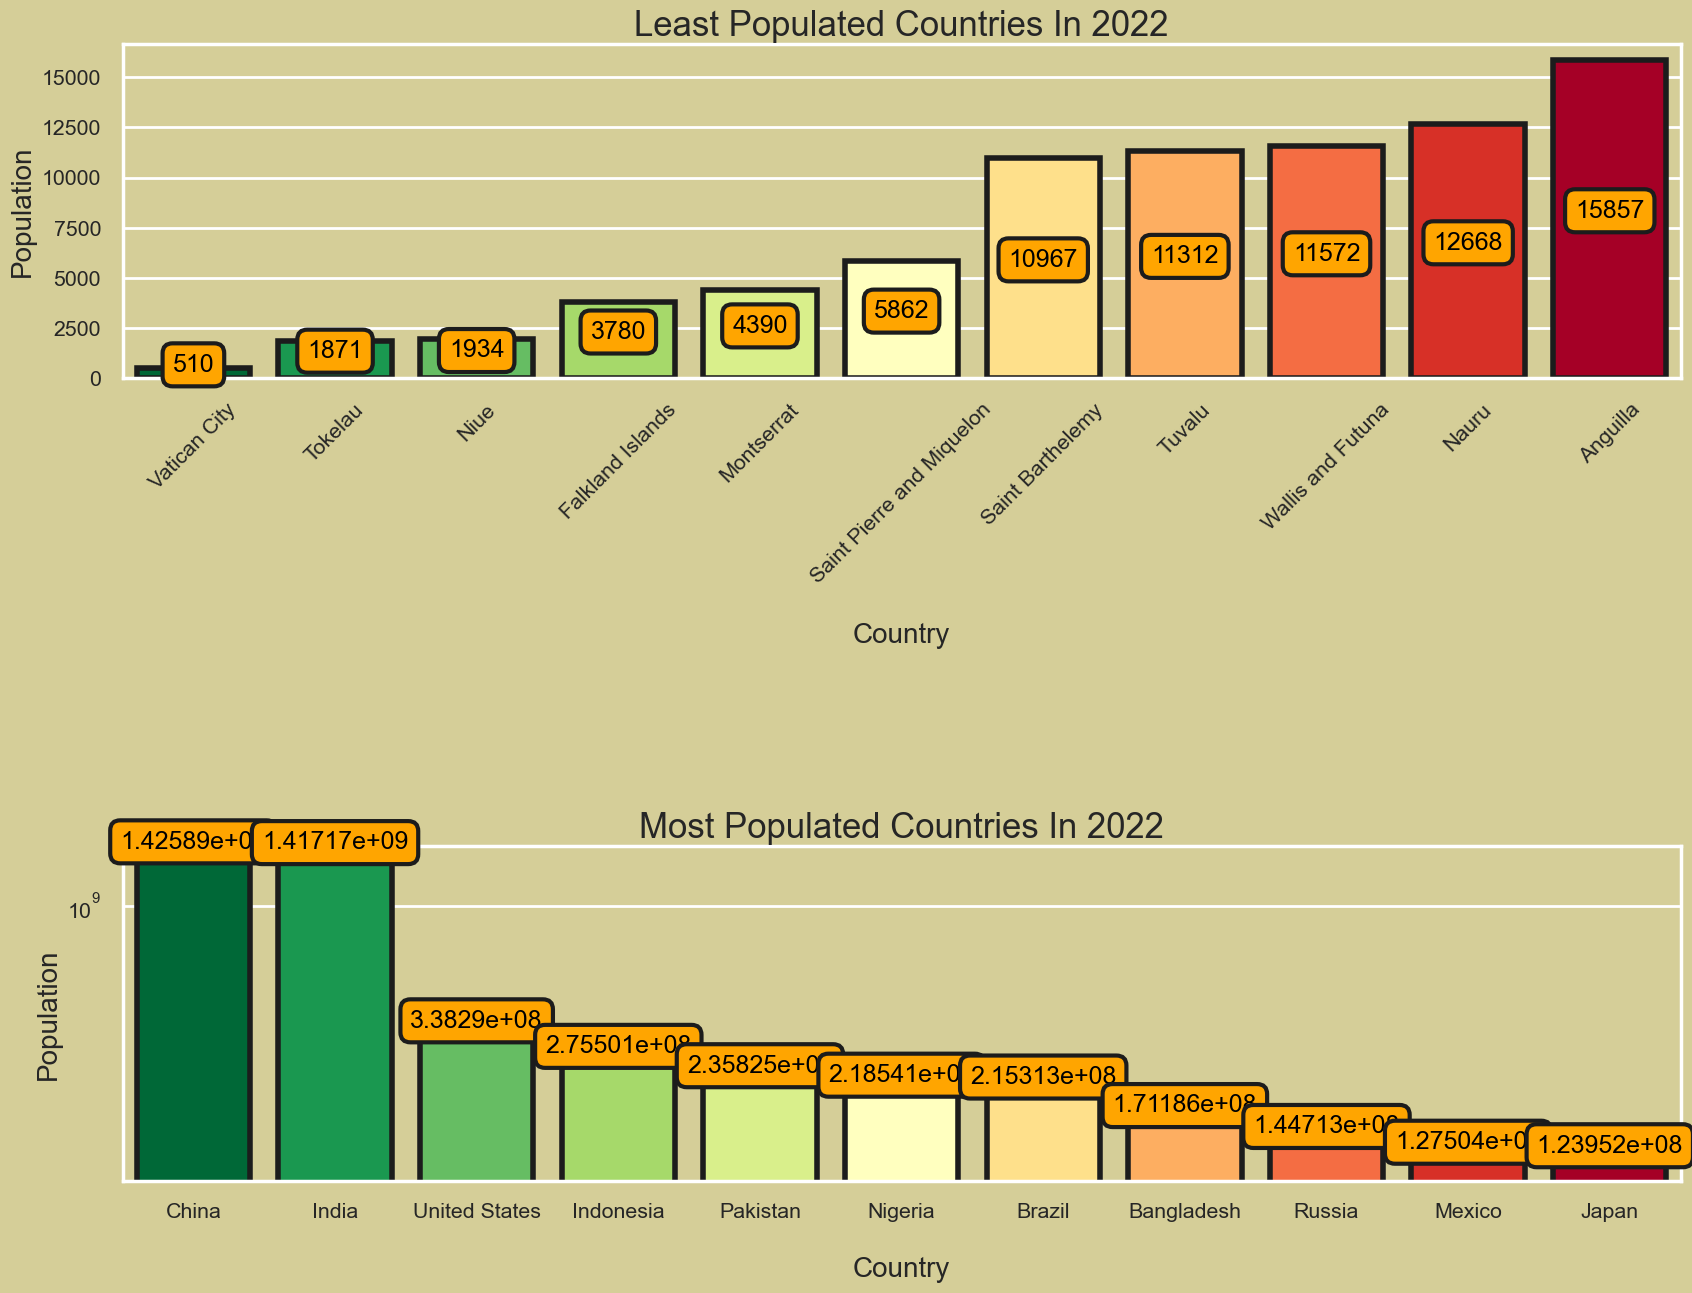

In [52]:
# Create two subplots
fig, axs = plt.subplots(2, 1, figsize=(20, 16))

# Plot the bar chart on the first subplot
sns.barplot(x=data["Country/Territory"], y=data["2022 Population"], order=data.sort_values("2022 Population", ascending=True)["Country/Territory"][:11], ax=axs[0], palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 4)

# Set the title and labels for the first subplot
axs[0].set_yscale("linear")
axs[0].set_title("Least Populated Countries In 2022", fontsize=25)
axs[0].set_xlabel("\nCountry", fontsize=20)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
axs[0].set_ylabel("Population", fontsize=20)
for container in axs[0].containers:
    axs[0].bar_label(container,label_type="center",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 3, "alpha": 1})

# Plot the bar chart on the second subplot
sns.barplot(x=data["Country/Territory"], y=data["2022 Population"], order=data.sort_values("2022 Population", ascending=False)["Country/Territory"][:11], ax=axs[1], palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 4)

# Set the title and labels for the second subplot
axs[1].set_yscale("log")
axs[1].set_title("Most Populated Countries In 2022", fontsize=25)
axs[1].set_xlabel("\nCountry", fontsize=20)
axs[1].set_ylabel("Population", fontsize=20)
for container in axs[1].containers:
    axs[1].bar_label(container,label_type="edge",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 3, "alpha": 1})
    
# Adjust the layout of the figure
plt.tight_layout(pad=7.0)

# Show the figure
plt.show()

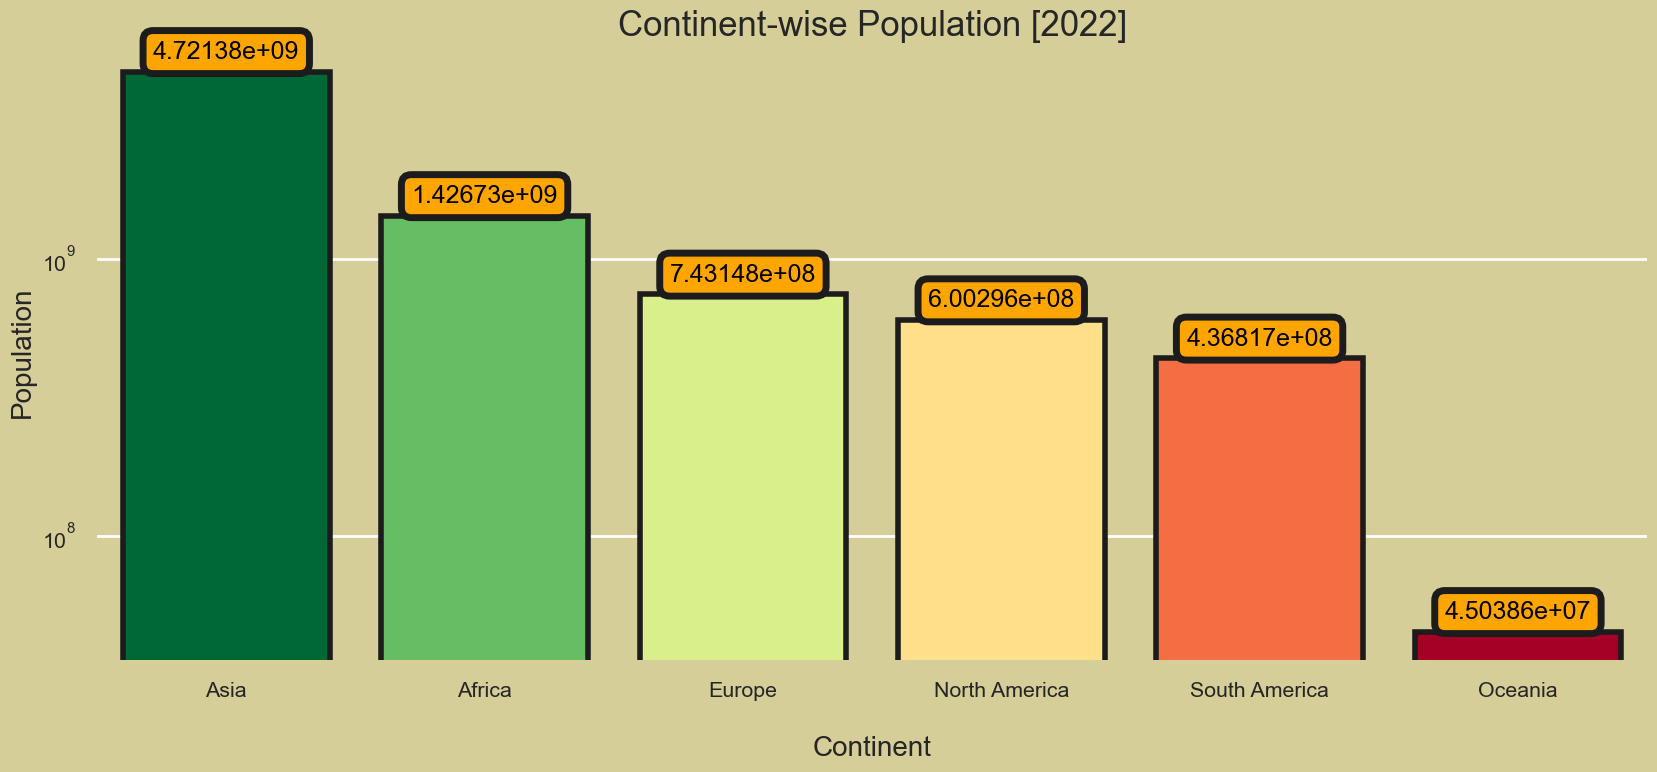

In [50]:
# create a copy of the data
data_pop = data.copy()
# Group by continents and calculate the population for each continent
data_pop = pd.DataFrame(data_pop.groupby(["Continent"])[["1970 Population","1980 Population","1990 Population","2000 Population","2010 Population","2015 Population","2020 Population","2022 Population"]].sum())

# plot this as a bar graph
plt.subplots(figsize=(20,8))
p=sns.barplot(x=data_pop.index, y=data_pop["2022 Population"],order=data_pop.sort_values("2022 Population",ascending=False).index,palette=palette[0:11:2], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.set_yscale("log")
p.set_title("Continent-wise Population [2022]",fontsize=25)
p.set_xlabel("\nContinent",fontsize=20)
p.set_ylabel("Population",fontsize=20)
p.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 5, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

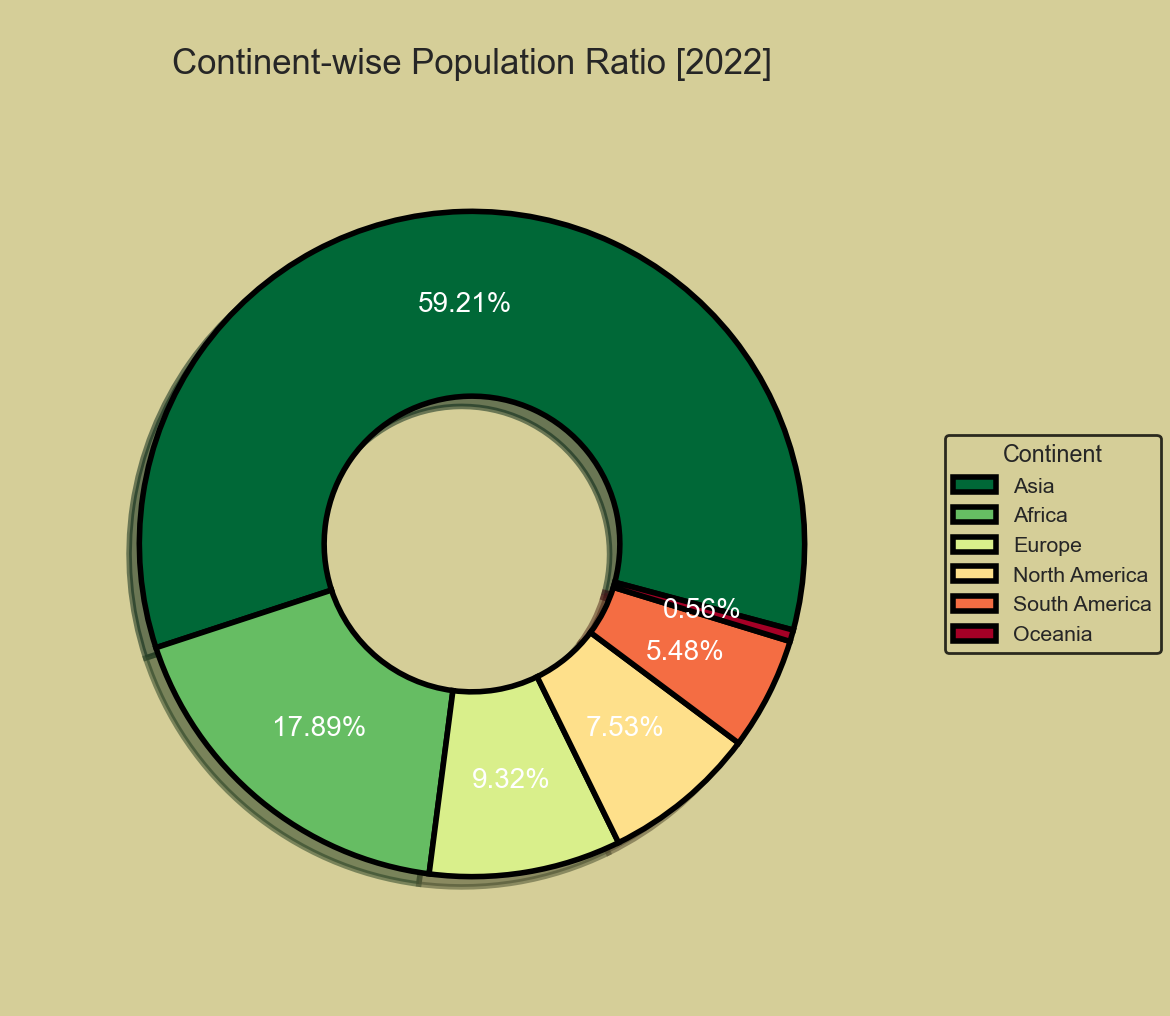

In [53]:
plt.subplots(figsize=(12, 12))
labels = "Asia","Africa","Europe","North America","South America","Oceania"
size = 0.5
wedges, texts, autotexts = plt.pie([data_pop.sort_values("2022 Population",ascending=False)["2022 Population"][0],
                                    data_pop.sort_values("2022 Population",ascending=False)["2022 Population"][1],
                                    data_pop.sort_values("2022 Population",ascending=False)["2022 Population"][2],
                                    data_pop.sort_values("2022 Population",ascending=False)["2022 Population"][3],
                                    data_pop.sort_values("2022 Population",ascending=False)["2022 Population"][4],
                                    data_pop.sort_values("2022 Population",ascending=False)["2022 Population"][5]],
                                    explode = (0,0,0,0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = palette[0:11:2], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = -15)

plt.legend(wedges, labels, title="Continent",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nContinent-wise Population Ratio [2022]",fontsize=25)
plt.show()

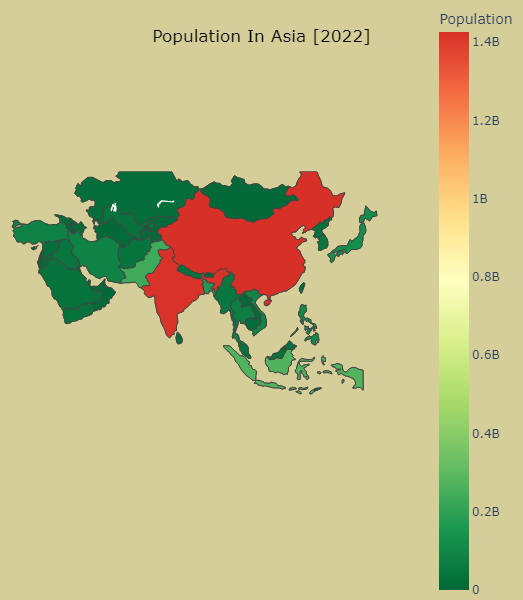

In [54]:
fig = px.choropleth(data_frame = data,
                    locations="Country/Territory",locationmode="country names", color="2022 Population",
                    color_continuous_scale=palette[:10],height= 600,scope="asia",
                    labels={"2022 Population":"Population"})


fig.update_layout(title=dict(text= "Population In Asia [2022]",
                             y=0.95,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  margin=dict(l=0, r=0, b=0, t=0),
                  geo_bgcolor="#D5CE98",
                  paper_bgcolor="#D5CE98")

fig.show()

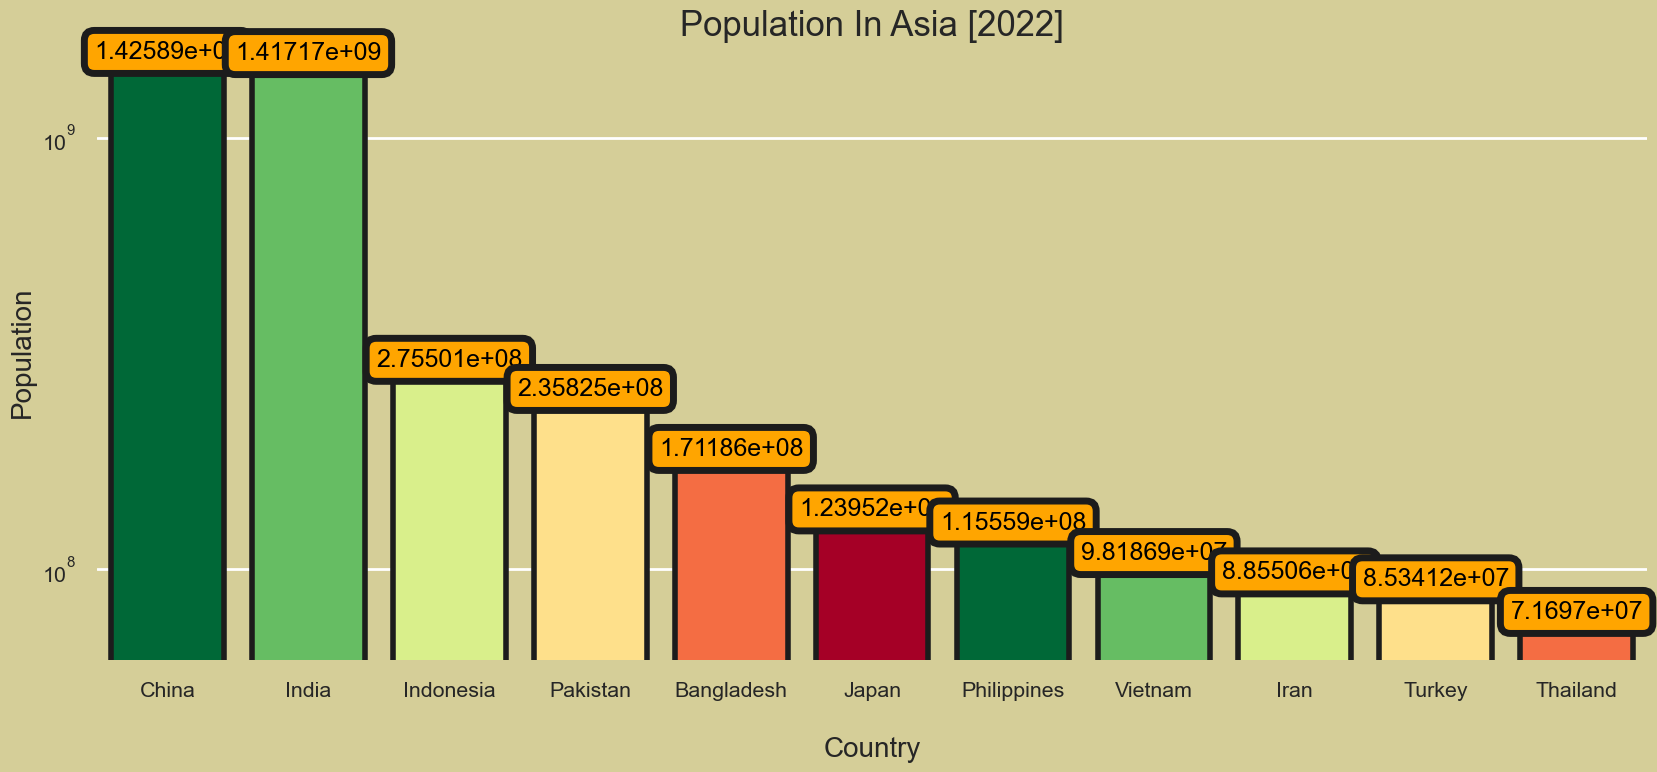

In [56]:
plt.subplots(figsize=(20,8))
p=sns.barplot(data=data[data["Continent"]=="Asia"],x="Country/Territory", y="2022 Population",order=data[data["Continent"]=="Asia"].sort_values("2022 Population",ascending=False)["Country/Territory"][:11],palette=palette[0:11:2], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.set_yscale("log")
p.set_title("Population In Asia [2022]",fontsize=25)
p.set_xlabel("\nCountry",fontsize=20)
p.set_ylabel("Population",fontsize=20)
p.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 5, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

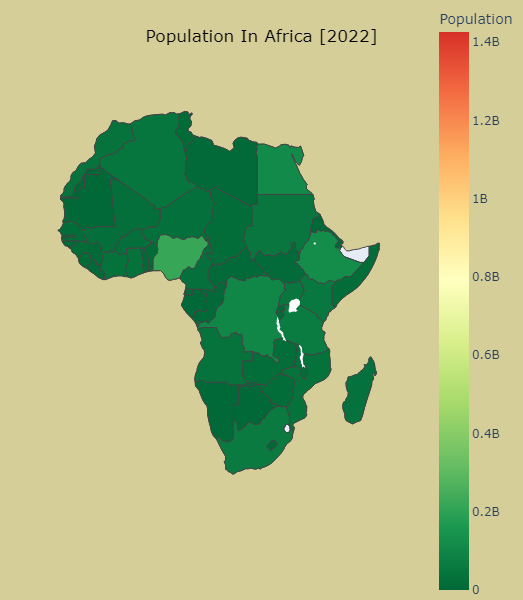

In [57]:
fig = px.choropleth(data_frame = data,
                    locations="Country/Territory",locationmode="country names", color="2022 Population",
                    color_continuous_scale=palette[:10],height= 600,scope="africa",
                    labels={"2022 Population":"Population"})


fig.update_layout(title=dict(text= "Population In Africa [2022]",
                             y=0.95,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  margin=dict(l=0, r=0, b=0, t=0),
                  geo_bgcolor="#D5CE98",
                  paper_bgcolor="#D5CE98")

fig.show()

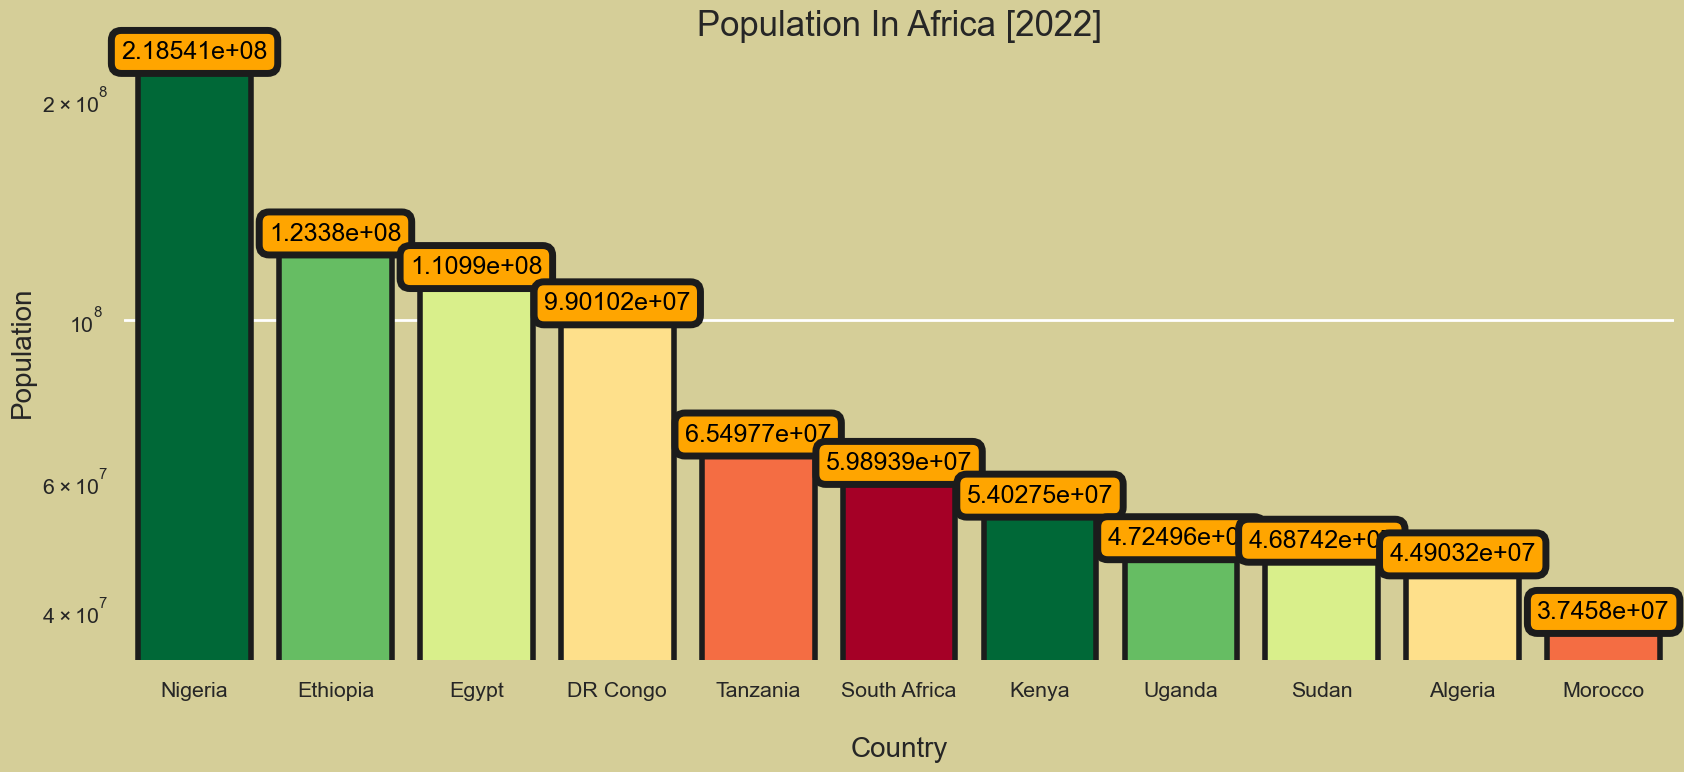

In [58]:
plt.subplots(figsize=(20,8))
p=sns.barplot(data=data[data["Continent"]=="Africa"],x="Country/Territory", y="2022 Population",order=data[data["Continent"]=="Africa"].sort_values("2022 Population",ascending=False)["Country/Territory"][:11],palette=palette[0:11:2], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.set_yscale("log")
p.set_title("Population In Africa [2022]",fontsize=25)
p.set_xlabel("\nCountry",fontsize=20)
p.set_ylabel("Population",fontsize=20)
p.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 5, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

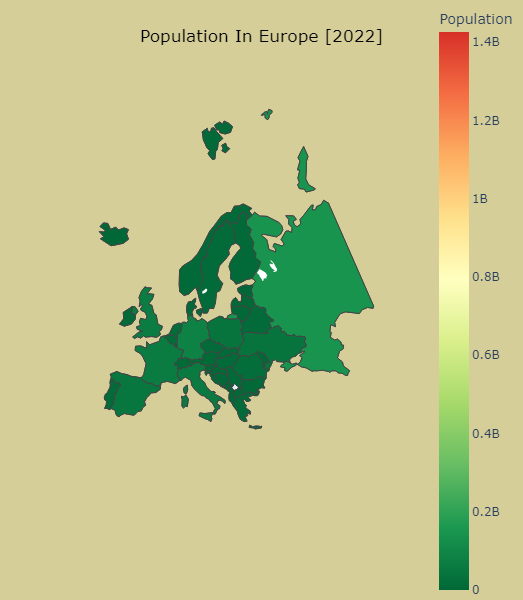

In [61]:
fig = px.choropleth(data_frame = data,
                    locations="Country/Territory",locationmode="country names", color="2022 Population",
                    color_continuous_scale=palette[:10],height= 600,scope="europe",
                    labels={"2022 Population":"Population"})


fig.update_layout(title=dict(text= "Population In Europe [2022]",
                             y=0.95,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  margin=dict(l=0, r=0, b=0, t=0),
                  geo_bgcolor="#D5CE98",
                  paper_bgcolor="#D5CE98")

fig.show()

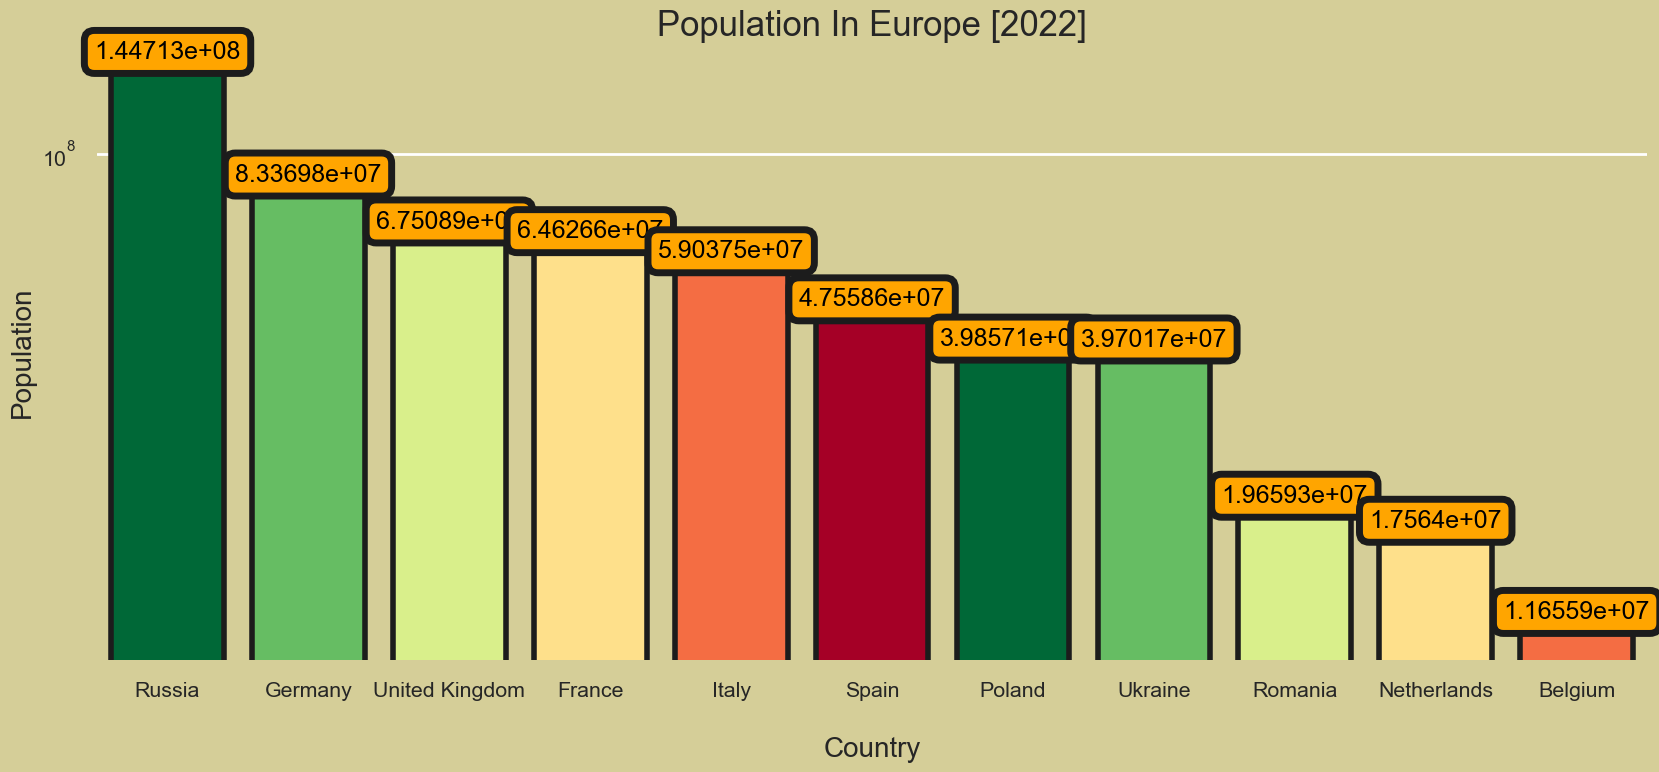

In [62]:
plt.subplots(figsize=(20,8))
p=sns.barplot(data=data[data["Continent"]=="Europe"],x="Country/Territory", y="2022 Population",order=data[data["Continent"]=="Europe"].sort_values("2022 Population",ascending=False)["Country/Territory"][:11],palette=palette[0:11:2], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.set_yscale("log")
p.set_title("Population In Europe [2022]",fontsize=25)
p.set_xlabel("\nCountry",fontsize=20)
p.set_ylabel("Population",fontsize=20)
p.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 5, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

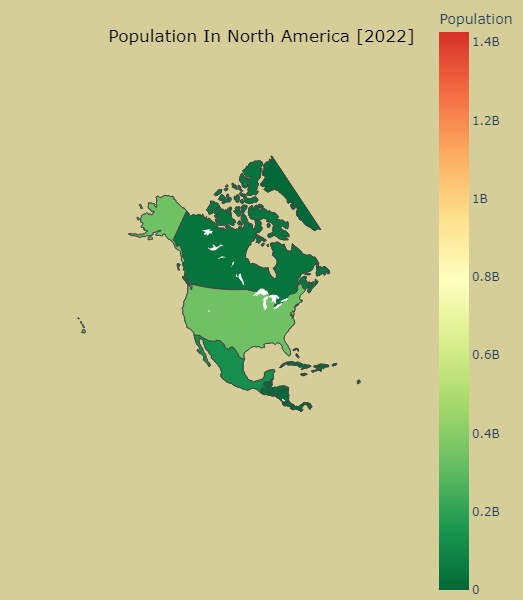

In [63]:
fig = px.choropleth(data_frame = data,
                    locations="Country/Territory",locationmode="country names", color="2022 Population",
                    color_continuous_scale=palette[:10],height= 600,scope="north america",
                    labels={"2022 Population":"Population"})


fig.update_layout(title=dict(text= "Population In North America [2022]",
                             y=0.95,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  margin=dict(l=0, r=0, b=0, t=0),
                  geo_bgcolor="#D5CE98",
                  paper_bgcolor="#D5CE98")

fig.show()

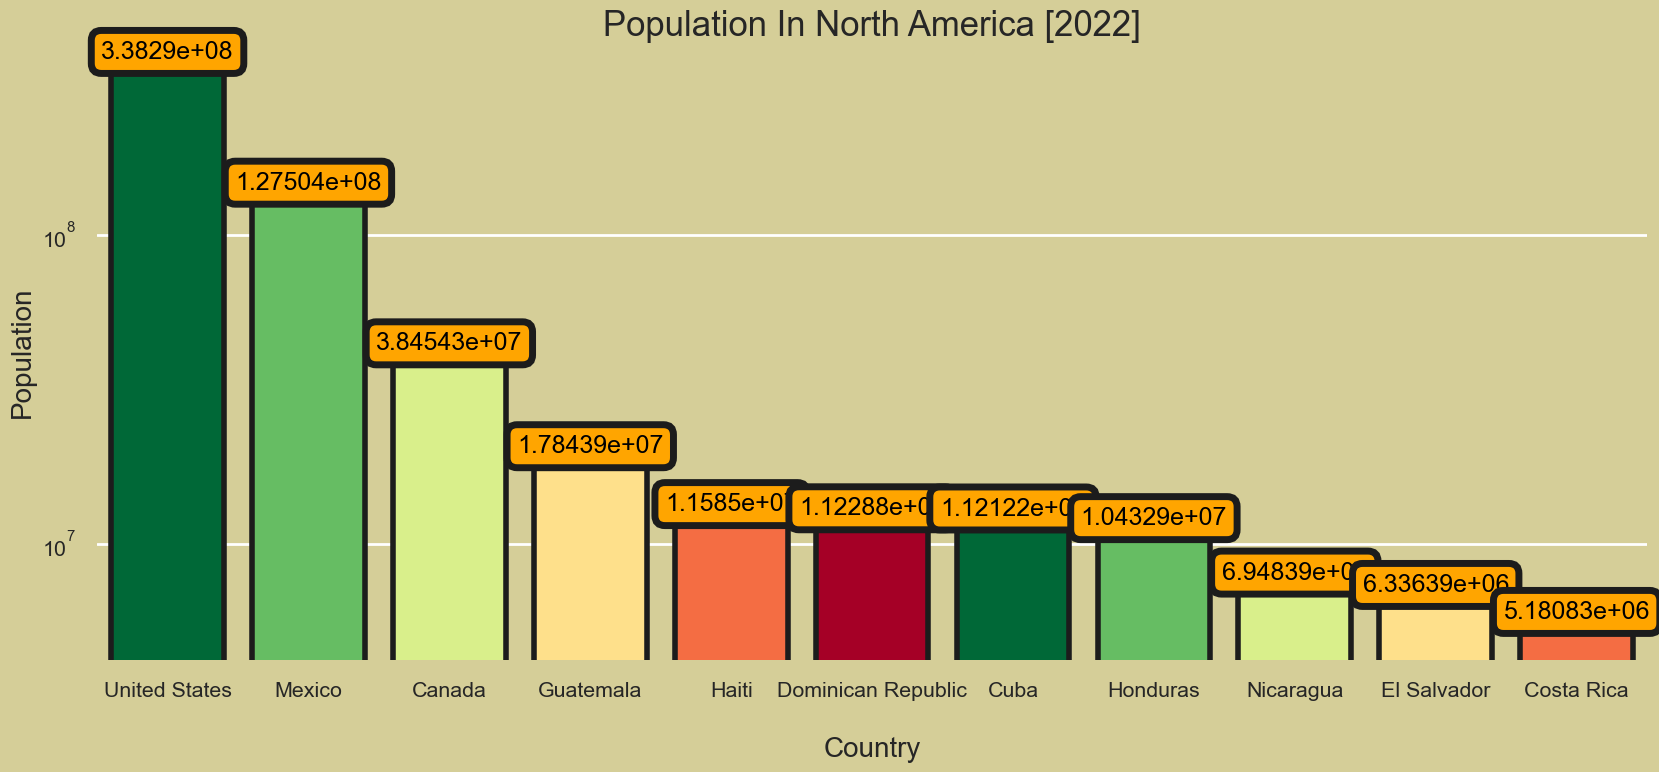

In [64]:
plt.subplots(figsize=(20,8))
p=sns.barplot(data=data[data["Continent"]=="North America"],x="Country/Territory", y="2022 Population",order=data[data["Continent"]=="North America"].sort_values("2022 Population",ascending=False)["Country/Territory"][:11],palette=palette[0:11:2], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.set_yscale("log")
p.set_title("Population In North America [2022]",fontsize=25)
p.set_xlabel("\nCountry",fontsize=20)
p.set_ylabel("Population",fontsize=20)
p.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 5, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

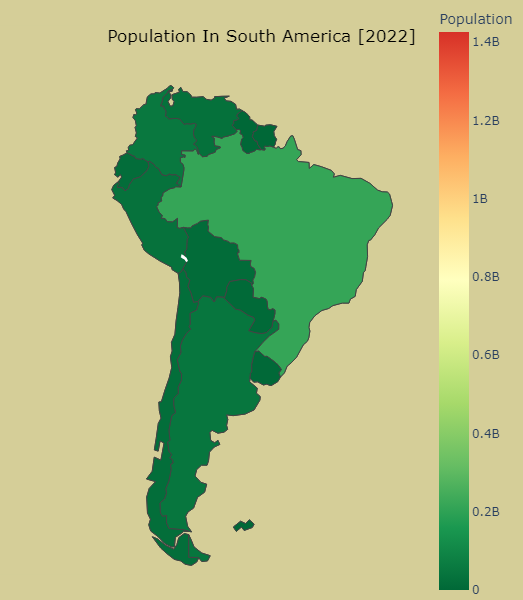

In [65]:
fig = px.choropleth(data_frame = data,
                    locations="Country/Territory",locationmode="country names", color="2022 Population",
                    color_continuous_scale=palette[:10],height= 600,scope="south america",
                    labels={"2022 Population":"Population"})


fig.update_layout(title=dict(text= "Population In South America [2022]",
                             y=0.95,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  margin=dict(l=0, r=0, b=0, t=0),
                  geo_bgcolor="#D5CE98",
                  paper_bgcolor="#D5CE98")

fig.show()

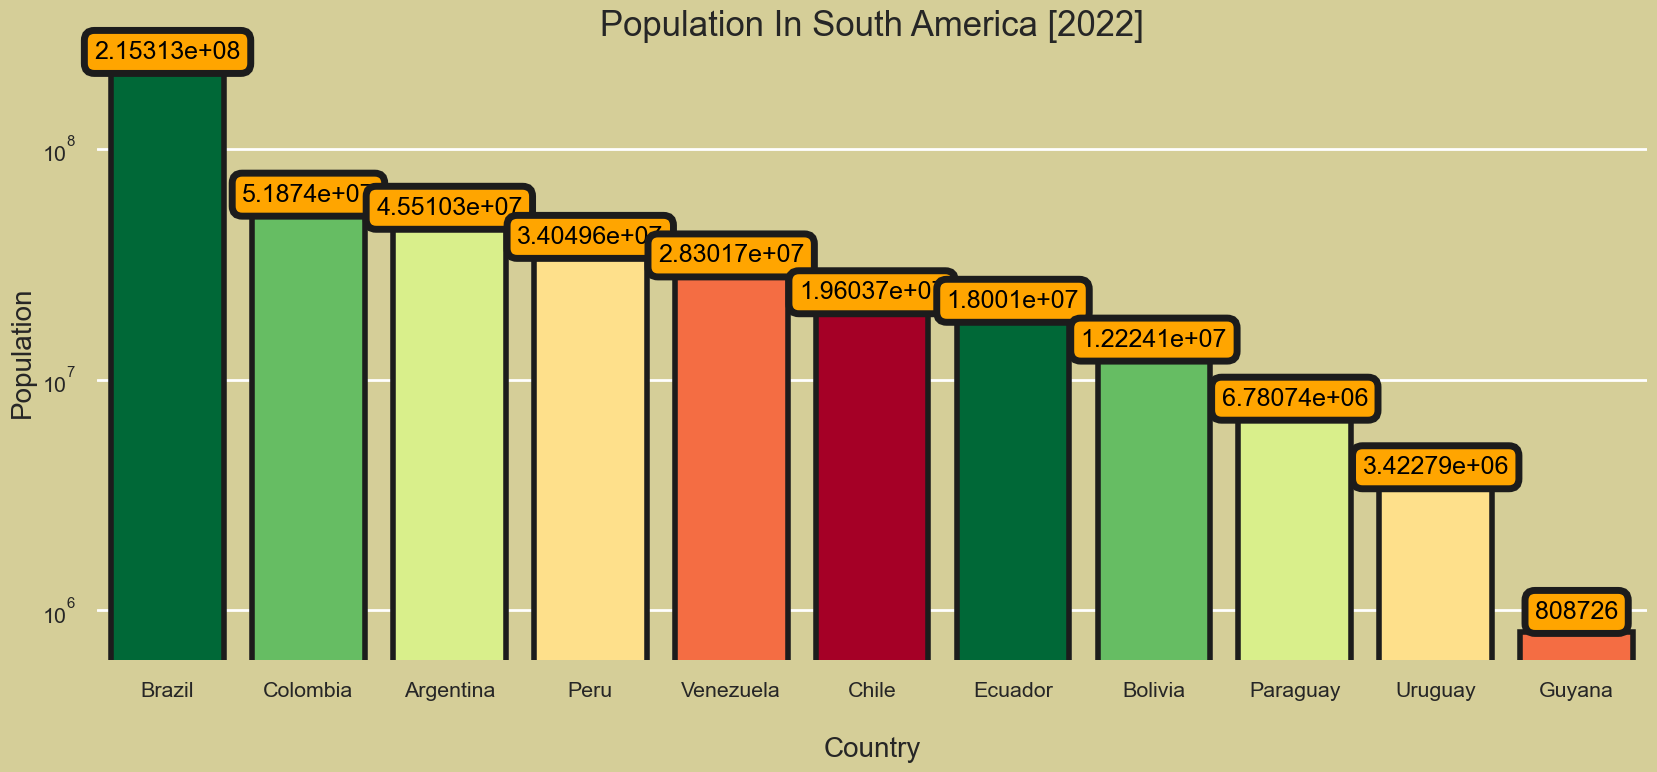

In [66]:
plt.subplots(figsize=(20,8))
p=sns.barplot(data=data[data["Continent"]=="South America"],x="Country/Territory", y="2022 Population",order=data[data["Continent"]=="South America"].sort_values("2022 Population",ascending=False)["Country/Territory"][:11],palette=palette[0:11:2], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.set_yscale("log")
p.set_title("Population In South America [2022]",fontsize=25)
p.set_xlabel("\nCountry",fontsize=20)
p.set_ylabel("Population",fontsize=20)
p.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 5, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

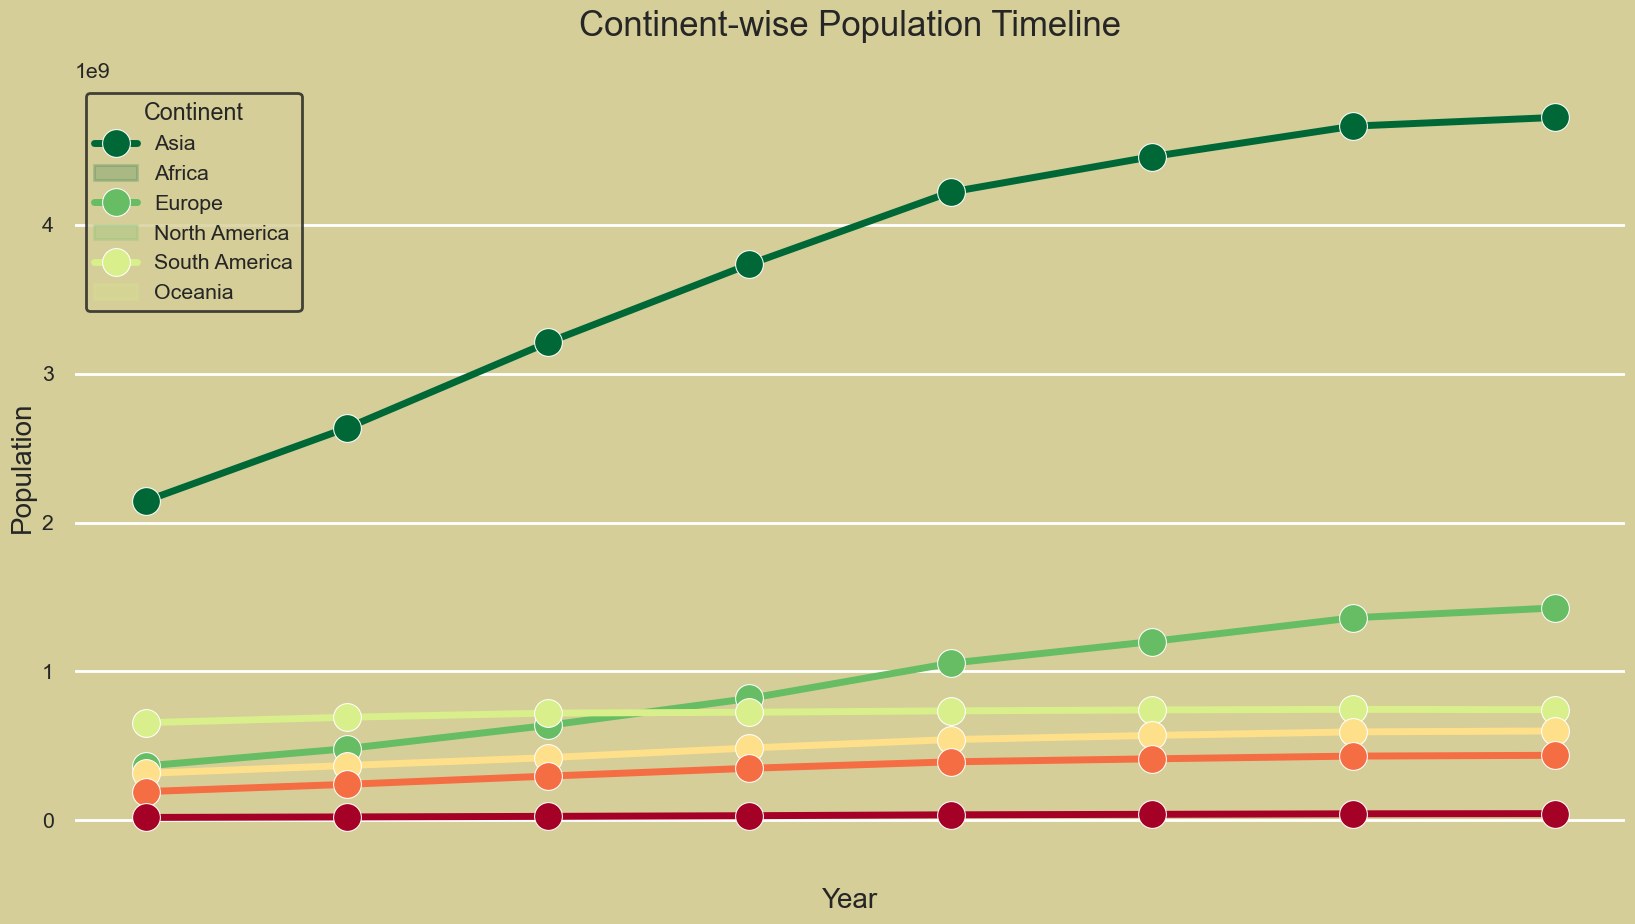

In [75]:
fig, axs = plt.subplots(figsize=(20,10))

sns.lineplot(x=data_pop.T.index ,y=data_pop.T["Asia"],data=data_pop.T,ax=axs,color="#006837",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_pop.T.index ,y=data_pop.T["Africa"],data=data_pop.T,ax=axs,color="#66BD63",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_pop.T.index ,y=data_pop.T["Europe"],data=data_pop.T,ax=axs,color="#D9EF8B",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_pop.T.index ,y=data_pop.T["North America"],data=data_pop.T,ax=axs,color="#FEE08B",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_pop.T.index ,y=data_pop.T["South America"],data=data_pop.T,ax=axs,color="#F46D43",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_pop.T.index ,y=data_pop.T["Oceania"],data=data_pop.T,ax=axs,color="#A50026",marker="o",linewidth=5,markersize=20)

axs.set_title("Continent-wise Population Timeline\n",fontsize=25)
axs.set_xlabel("\nYear",fontsize=20)
axs.set_ylabel("Population",fontsize=20)
axs.legend(["Asia","Africa","Europe","North America","South America","Oceania"],title="Continent", edgecolor = "#1c1c1c")
axs.set_xticks([],minor=False)

sns.despine(left=True, bottom=True)
plt.show()

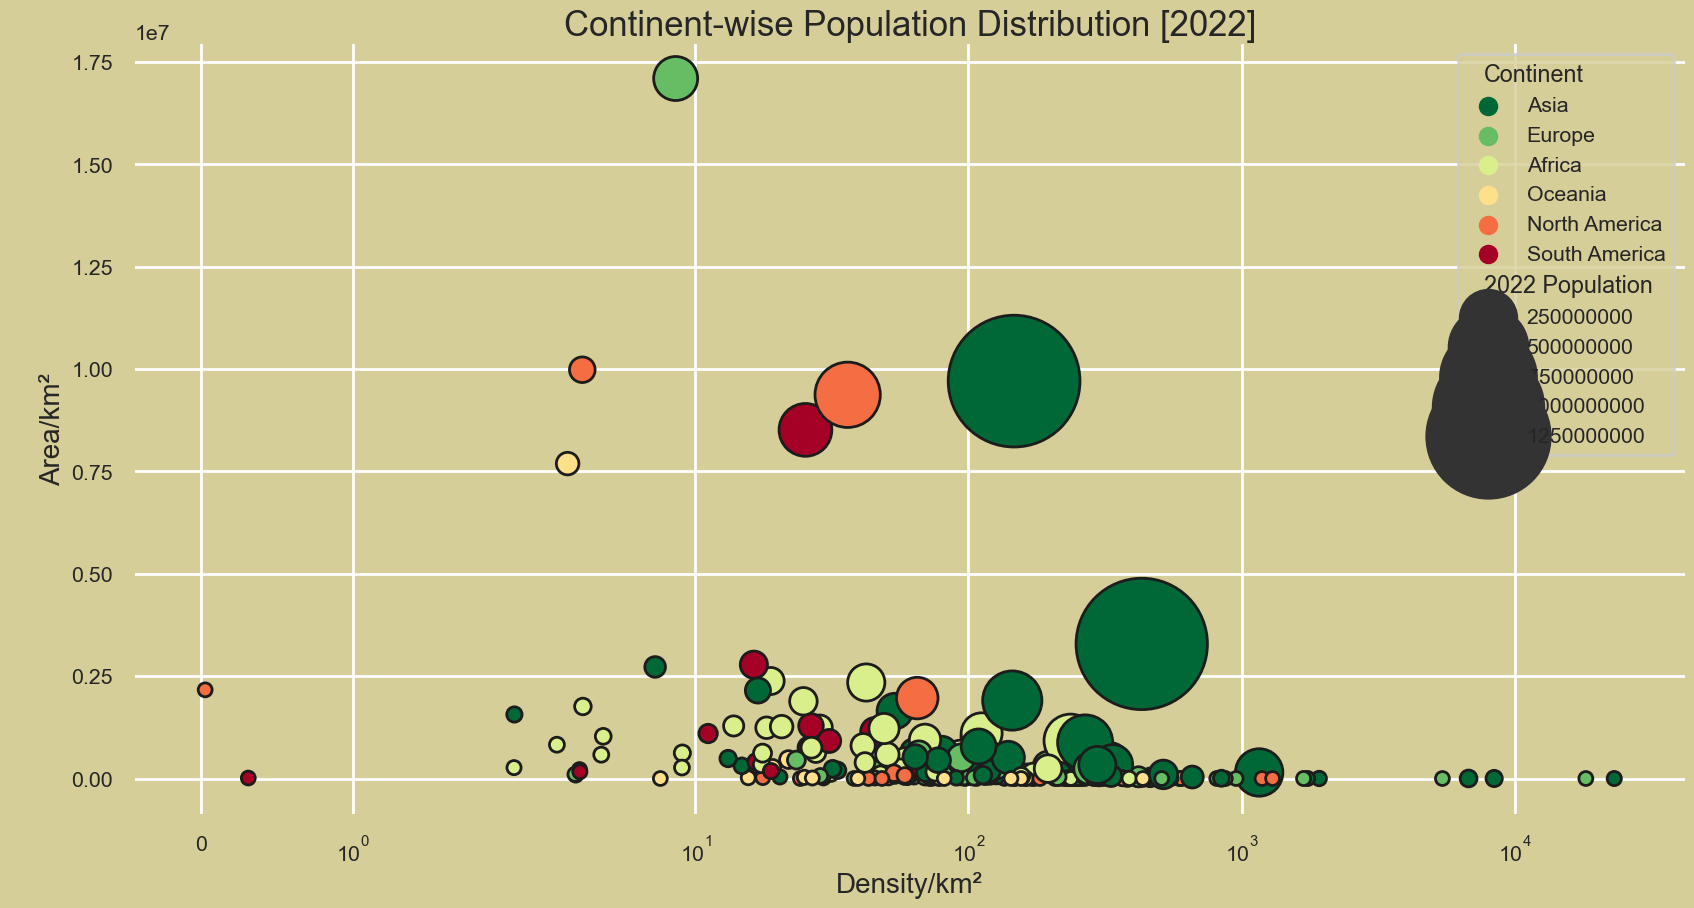

In [76]:
plt.subplots(figsize=(20,10))
p=sns.scatterplot(x=data["Density (per km²)"], y=data["Area (km²)"], hue=data["Continent"],size=data["2022 Population"],palette=palette[0:11:2], edgecolor = "#1c1c1c", linewidth = 2,sizes=(100, 9000),alpha=1)
p.set_xscale("symlog")
p.set_yscale("linear")
p.set_title("Continent-wise Population Distribution [2022]",fontsize=25)
p.set_xlabel("Density/km²",fontsize=20)
p.set_ylabel("\nArea/km²",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

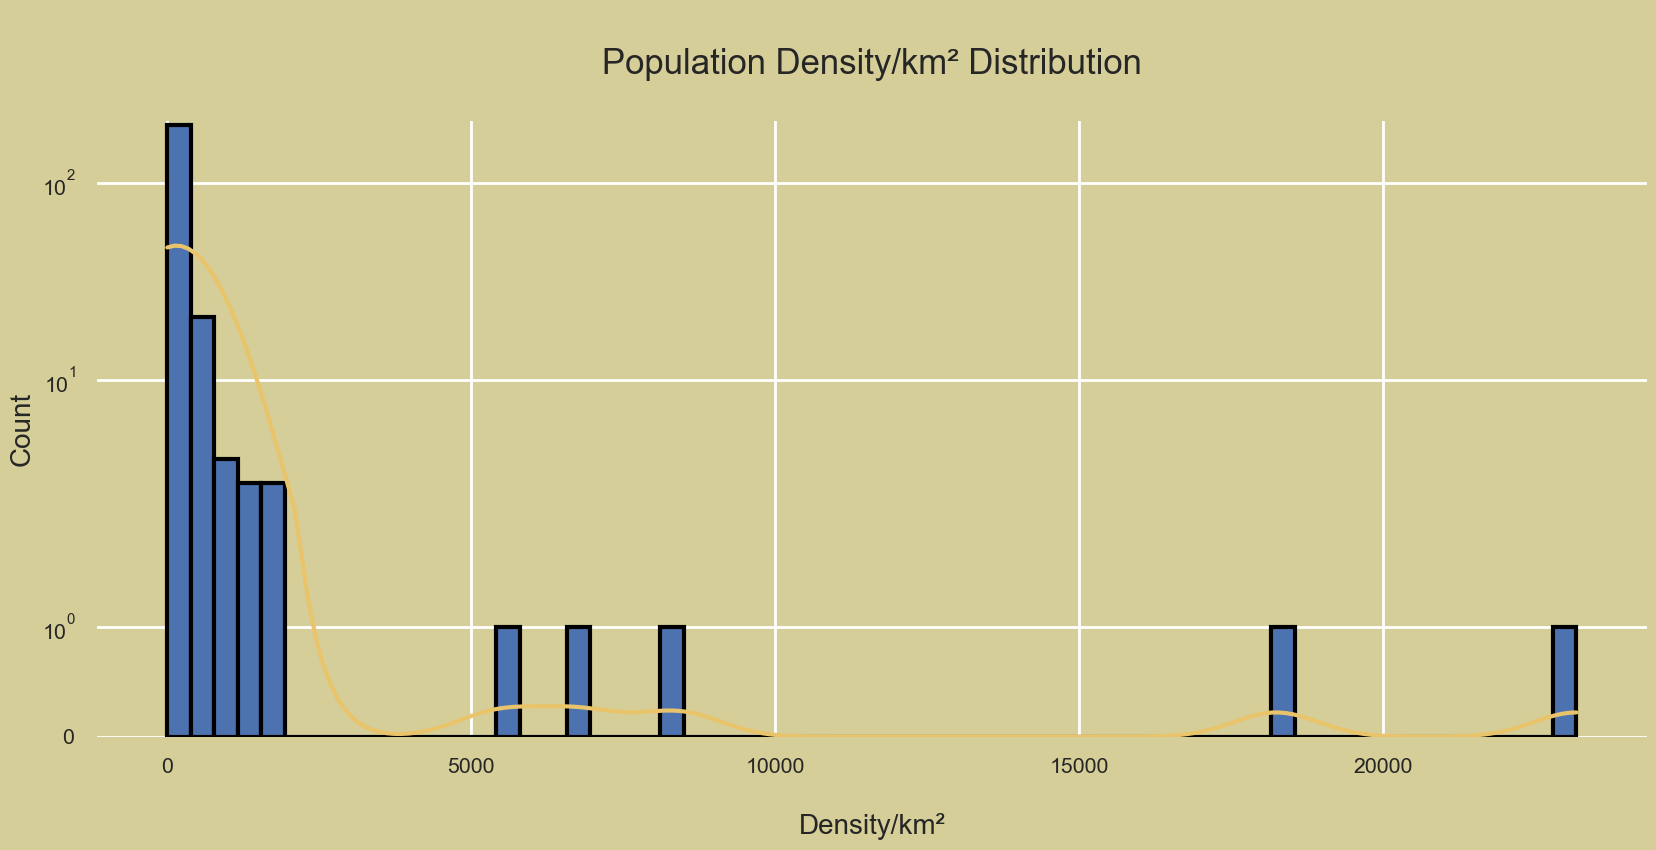

In [81]:
plt.subplots(figsize=(20, 8))
p = sns.histplot(data["Density (per km²)"],kde=True,bins=60,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color("#e9c46a")
p.axes.set_yscale("symlog")
p.axes.set_title("\nPopulation Density/km² Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nDensity/km²",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

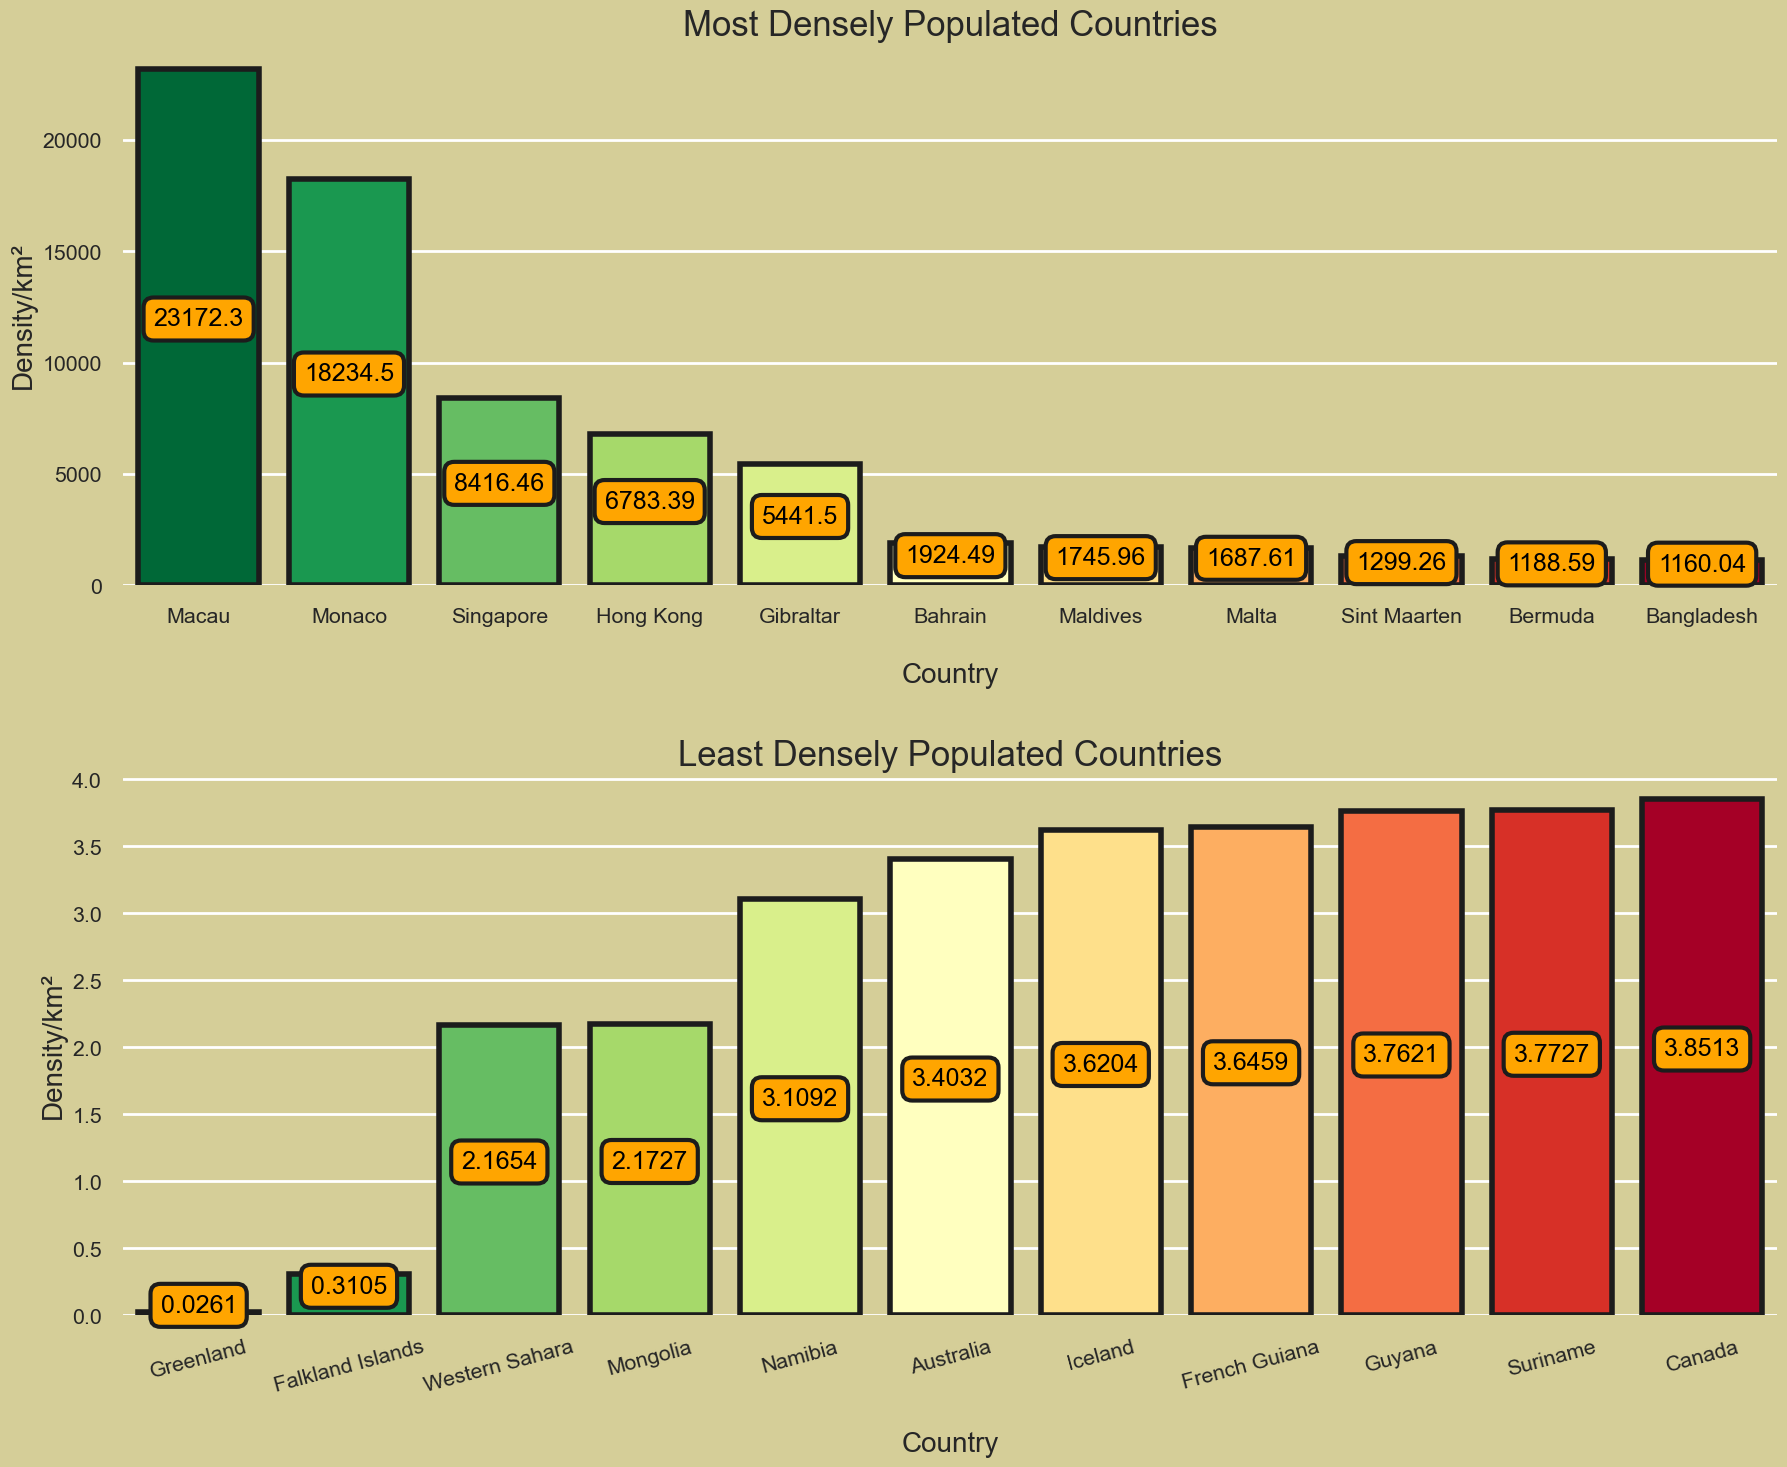

In [82]:
fig, axs = plt.subplots(2,1,figsize=(20,16))
plt.tight_layout(pad=6.0)

sns.barplot(x=data["Country/Territory"],y=data["Density (per km²)"],order=data.sort_values("Density (per km²)",ascending=False)["Country/Territory"][:11],ax=axs[0],palette=palette, saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
axs[0].set_yscale("linear")
axs[0].set_title("Most Densely Populated Countries",fontsize=25)
axs[0].set_xlabel("\nCountry",fontsize=20)
axs[0].set_ylabel("Density/km²",fontsize=20)
axs[0].set_xticklabels(axs[0].get_xticklabels(),rotation = 0)
for container in axs[0].containers:
    axs[0].bar_label(container,label_type="center",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 3, "alpha": 1})

sns.barplot(x=data["Country/Territory"],y=data["Density (per km²)"],order=data.sort_values("Density (per km²)",ascending=True)["Country/Territory"][:11],ax=axs[1],palette=palette, saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
axs[1].set_yscale("linear")
axs[1].set_title("Least Densely Populated Countries",fontsize=25)
axs[1].set_xlabel("\nCountry",fontsize=20)
axs[1].set_ylabel("Density/km²",fontsize=20)
axs[1].set_xticklabels(axs[1].get_xticklabels(),rotation = 15)
for container in axs[1].containers:
    axs[1].bar_label(container,label_type="center",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 3, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

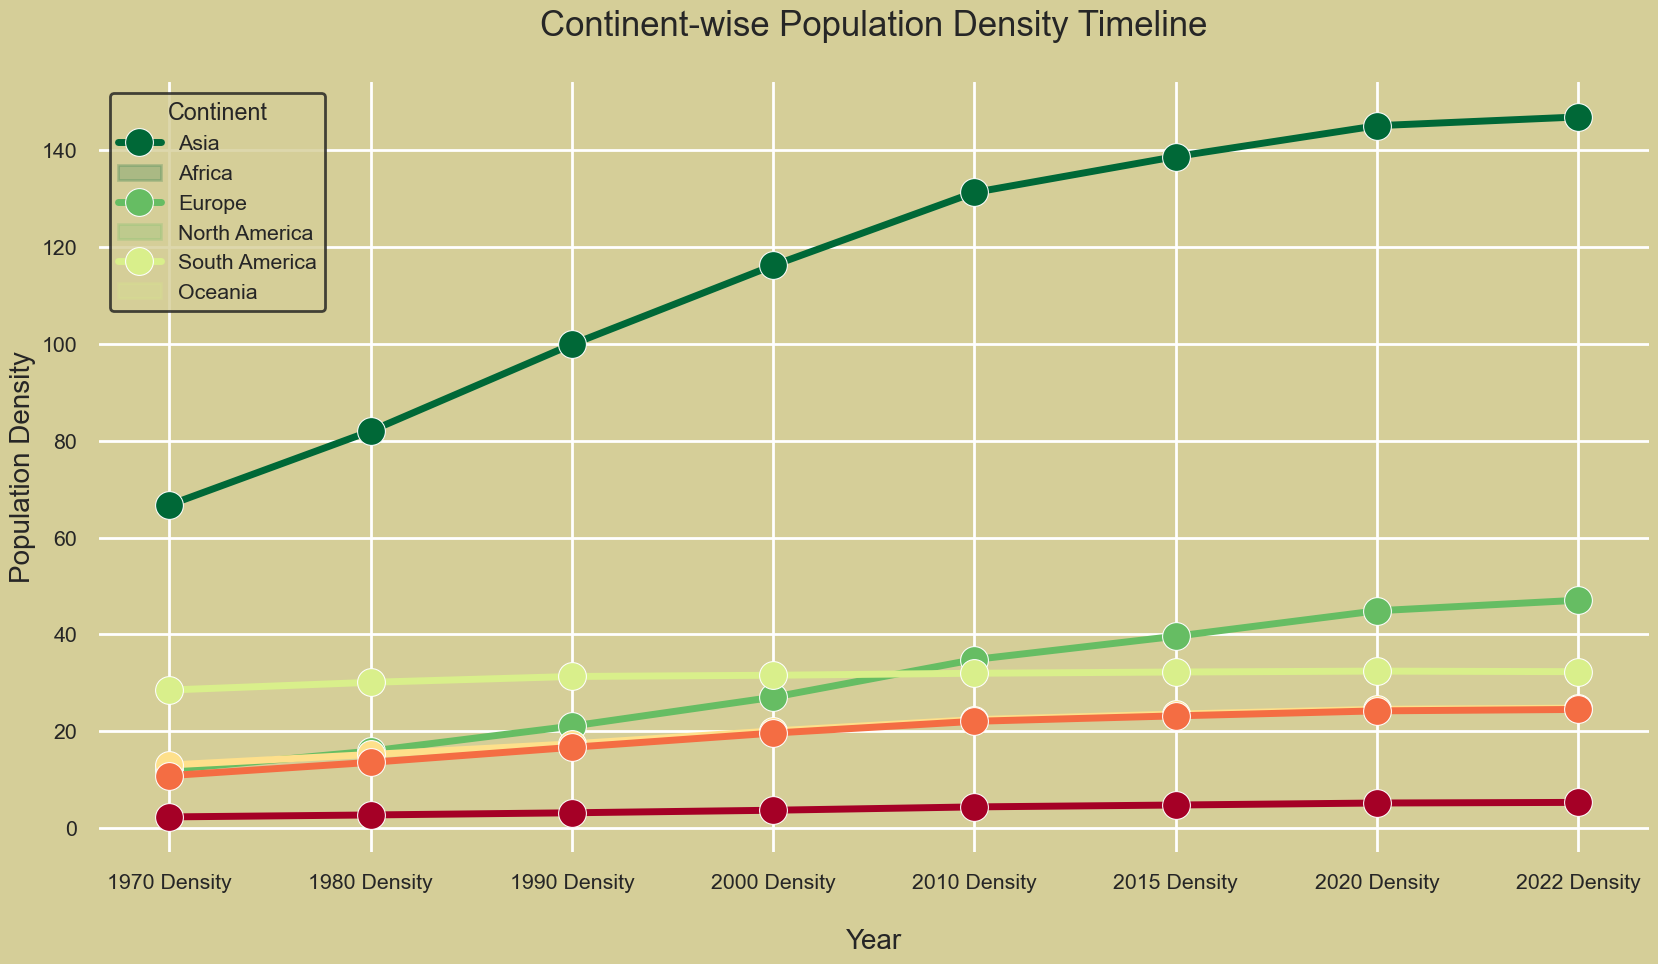

In [86]:
data_den = data.copy()
data_den = pd.DataFrame(data_den.groupby(["Continent"])[["1970 Population","1980 Population","1990 Population","2000 Population","2010 Population","2015 Population","2020 Population","2022 Population","Area (km²)"]].sum())
col = ["1970 Population","1980 Population","1990 Population","2000 Population","2010 Population","2015 Population","2020 Population","2022 Population"]
for i in col:
    data_den[i] = data_den[i]/data_den["Area (km²)"]    
data_den.rename(columns={"1970 Population":"1970 Density","1980 Population":"1980 Density","1990 Population":"1990 Density","2000 Population":"2000 Density","2010 Population":"2010 Density","2015 Population":"2015 Density","2020 Population":"2020 Density","2022 Population":"2022 Density"},inplace=True)
data_den.drop(columns="Area (km²)",inplace=True)


fig, axs = plt.subplots(figsize=(20,10))

sns.lineplot(x=data_den.T.index ,y=data_den.T["Asia"],data=data_den.T,ax=axs,color="#006837",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_den.T.index ,y=data_den.T["Africa"],data=data_den.T,ax=axs,color="#66BD63",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_den.T.index ,y=data_den.T["Europe"],data=data_den.T,ax=axs,color="#D9EF8B",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_den.T.index ,y=data_den.T["North America"],data=data_den.T,ax=axs,color="#FEE08B",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_den.T.index ,y=data_den.T["South America"],data=data_den.T,ax=axs,color="#F46D43",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_den.T.index ,y=data_den.T["Oceania"],data=data_den.T,ax=axs,color="#A50026",marker="o",linewidth=5,markersize=20)

axs.set_title("Continent-wise Population Density Timeline\n",fontsize=25)
axs.set_xlabel("\nYear",fontsize=20)
axs.set_ylabel("Population Density",fontsize=20)
axs.legend(["Asia","Africa","Europe","North America","South America","Oceania"],title="Continent", edgecolor = "#1c1c1c")
# axs.set_xticks([],minor=False)

sns.despine(left=True, bottom=True)
plt.show()

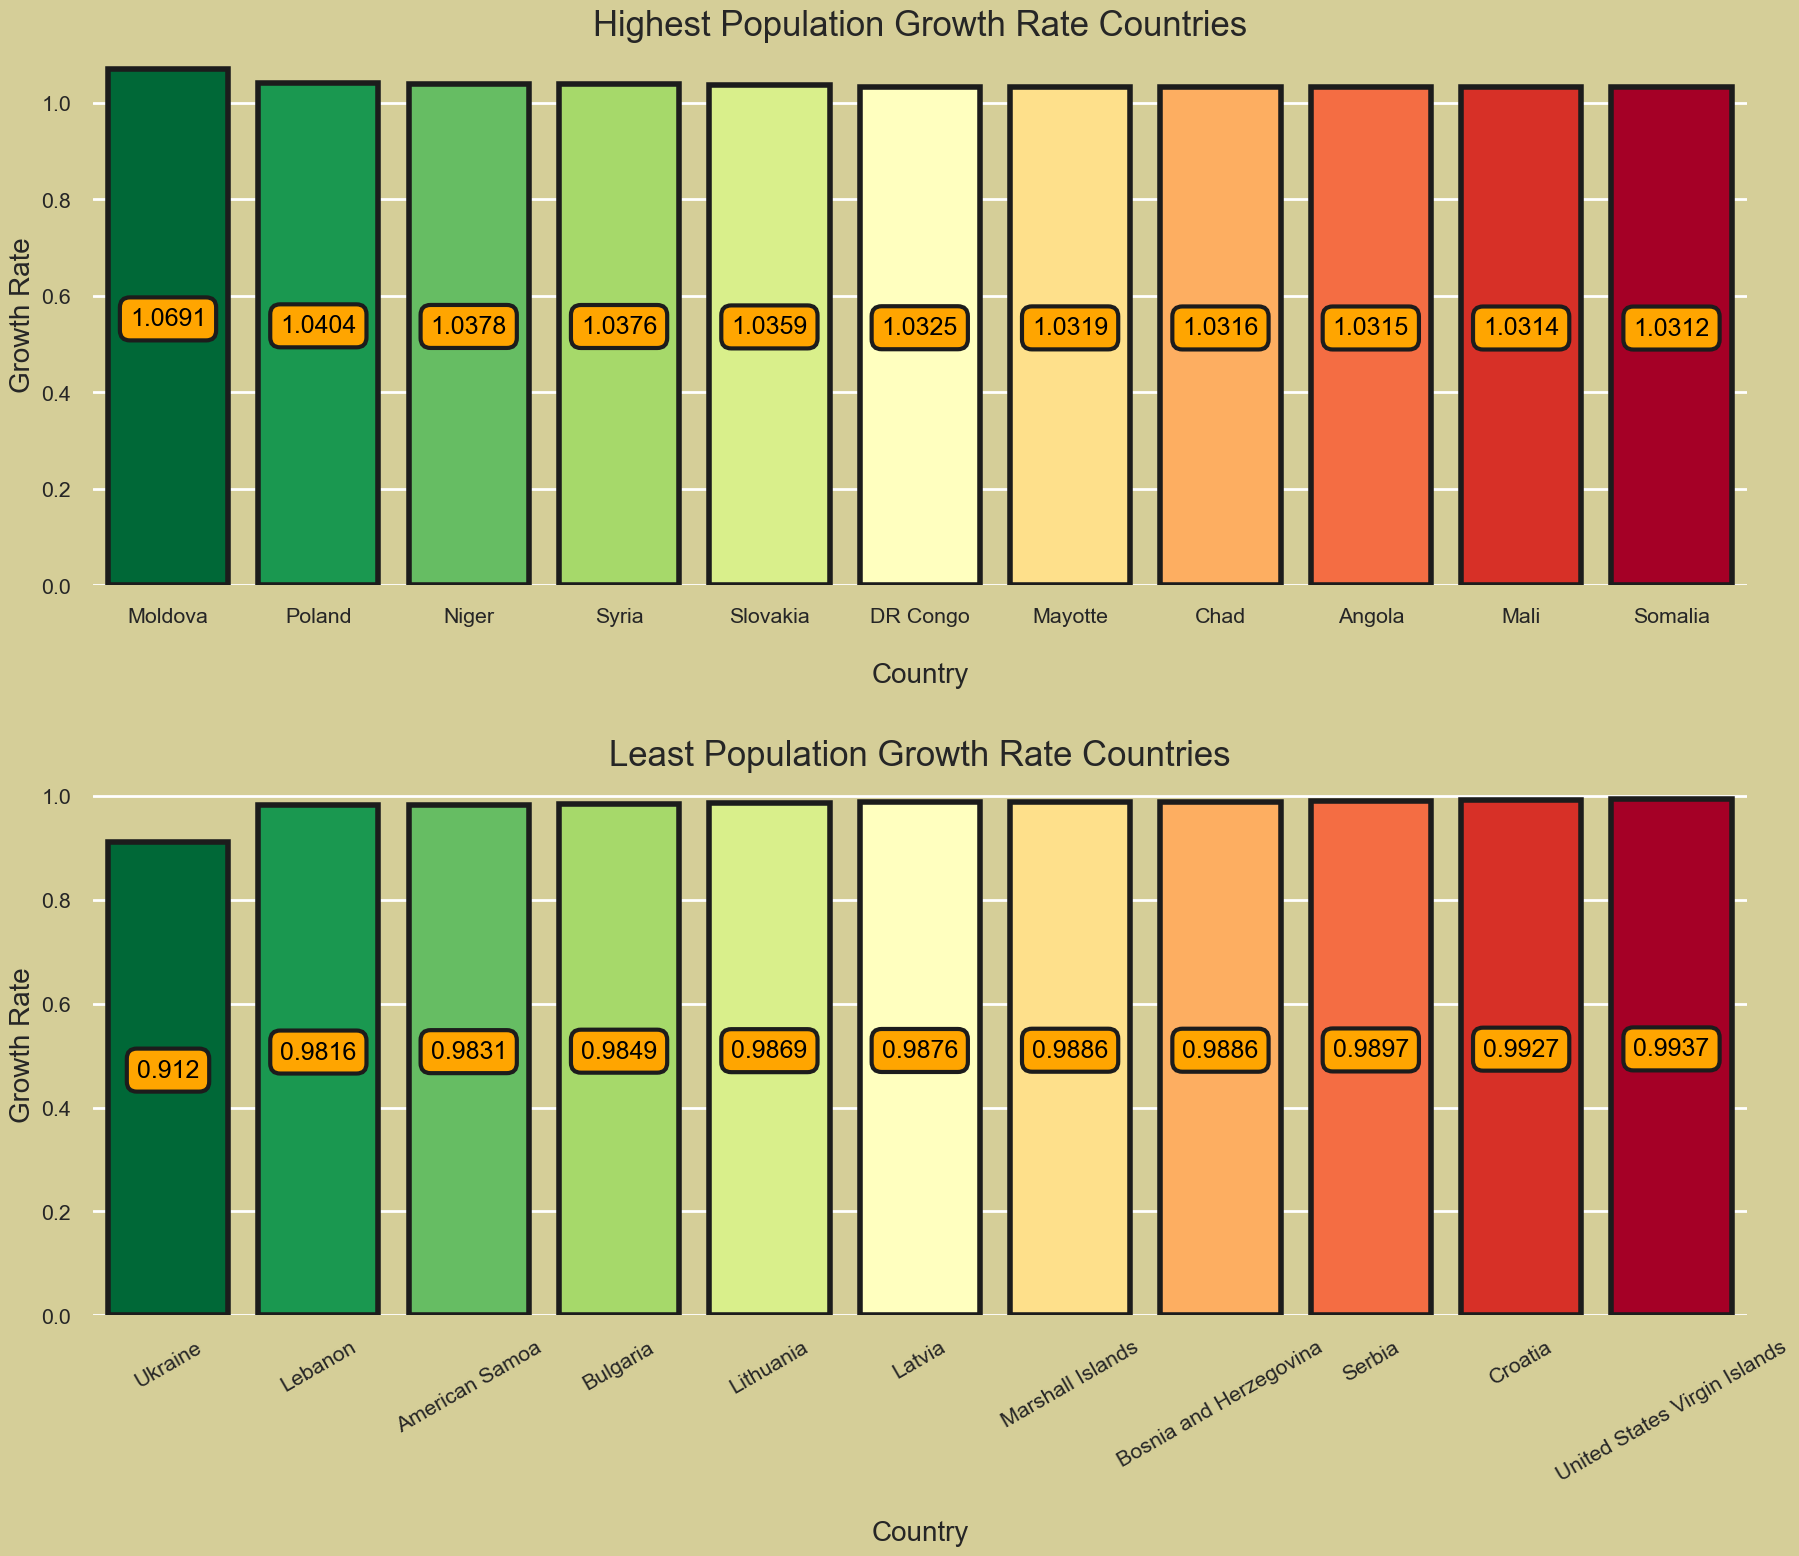

In [87]:
fig, axs = plt.subplots(2,1,figsize=(20,16))
plt.tight_layout(pad=6.0)

sns.barplot(x=data["Country/Territory"],y=data["Growth Rate"],order=data.sort_values("Growth Rate",ascending=False)["Country/Territory"][:11],ax=axs[0],palette=palette, saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
axs[0].set_yscale("linear")
axs[0].set_title("Highest Population Growth Rate Countries",fontsize=25)
axs[0].set_xlabel("\nCountry",fontsize=20)
axs[0].set_ylabel("Growth Rate",fontsize=20)
axs[0].set_xticklabels(axs[0].get_xticklabels(),rotation = 0)
for container in axs[0].containers:
    axs[0].bar_label(container,label_type="center",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 3, "alpha": 1})

sns.barplot(x=data["Country/Territory"],y=data["Growth Rate"],order=data.sort_values("Growth Rate",ascending=True)["Country/Territory"][:11],ax=axs[1],palette=palette, saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
axs[1].set_yscale("linear")
axs[1].set_title("Least Population Growth Rate Countries",fontsize=25)
axs[1].set_xlabel("\nCountry",fontsize=20)
axs[1].set_ylabel("Growth Rate",fontsize=20)
axs[1].set_xticklabels(axs[1].get_xticklabels(),rotation = 30)
for container in axs[1].containers:
    axs[1].bar_label(container,label_type="center",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 3, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

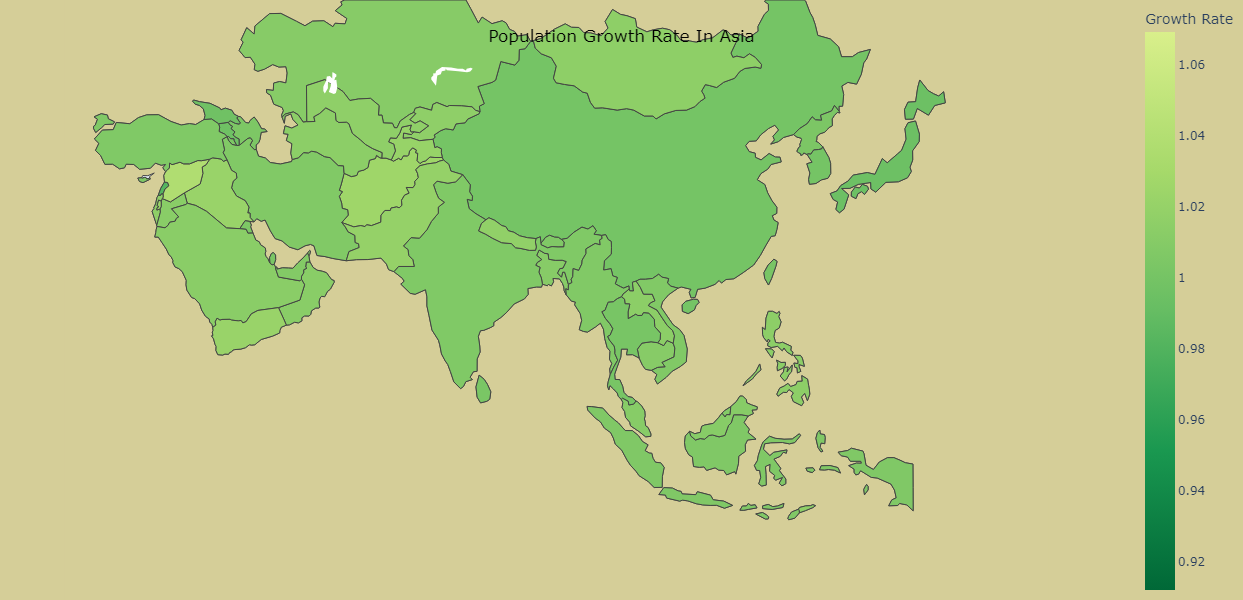

In [88]:
fig = px.choropleth(data_frame = data,
                    locations="Country/Territory",locationmode="country names", color="Growth Rate",
                    color_continuous_scale=palette[0:5],height= 600,scope="asia",
                    labels={"Growth Rate":"Growth Rate"})


fig.update_layout(title=dict(text= "Population Growth Rate In Asia",
                             y=0.95,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  margin=dict(l=0, r=0, b=0, t=0),
                  geo_bgcolor="#D5CE98",
                  paper_bgcolor="#D5CE98")

fig.show()

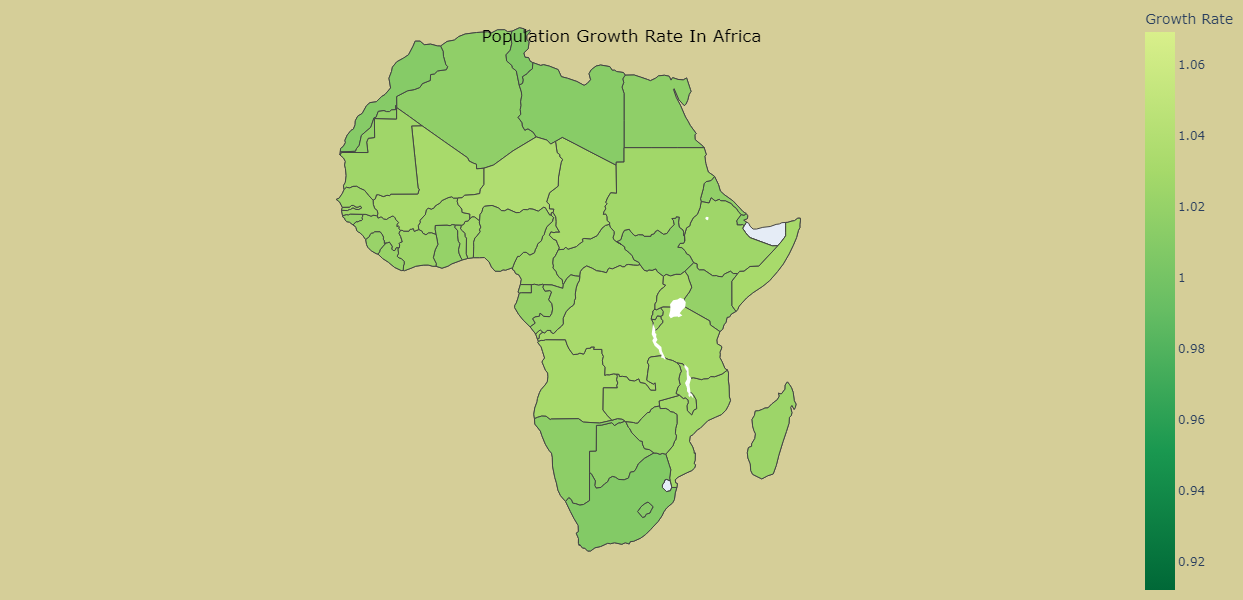

In [89]:
fig = px.choropleth(data_frame = data,
                    locations="Country/Territory",locationmode="country names", color="Growth Rate",
                    color_continuous_scale=palette[0:5],height= 600,scope="africa",
                    labels={"Growth Rate":"Growth Rate"})


fig.update_layout(title=dict(text= "Population Growth Rate In Africa",
                             y=0.95,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  margin=dict(l=0, r=0, b=0, t=0),
                  geo_bgcolor="#D5CE98",
                  paper_bgcolor="#D5CE98")

fig.show()

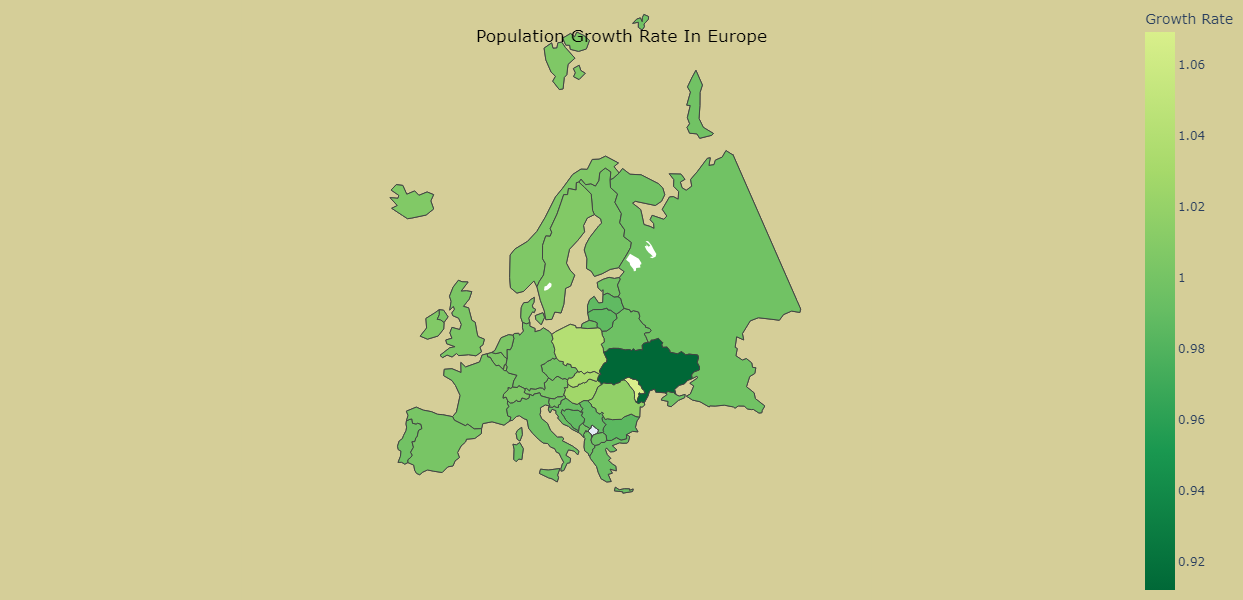

In [90]:
fig = px.choropleth(data_frame = data,
                    locations="Country/Territory",locationmode="country names", color="Growth Rate",
                    color_continuous_scale=palette[0:5],height= 600,scope="europe",
                    labels={"Growth Rate":"Growth Rate"})


fig.update_layout(title=dict(text= "Population Growth Rate In Europe",
                             y=0.95,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  margin=dict(l=0, r=0, b=0, t=0),
                  geo_bgcolor="#D5CE98",
                  paper_bgcolor="#D5CE98")

fig.show()

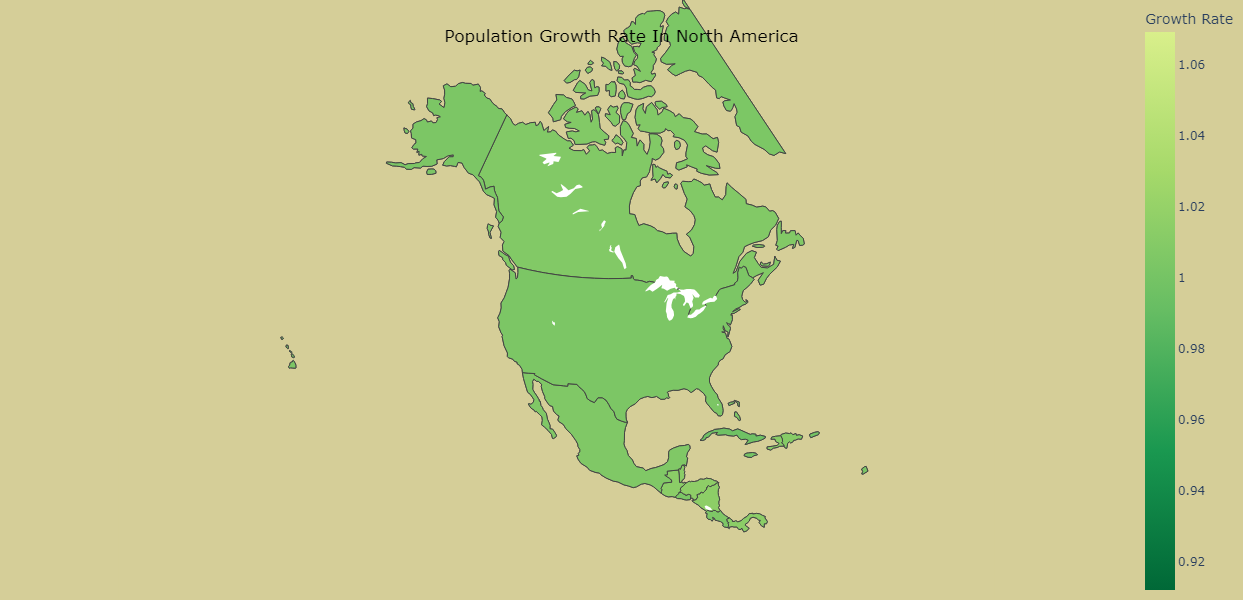

In [91]:
fig = px.choropleth(data_frame = data,
                    locations="Country/Territory",locationmode="country names", color="Growth Rate",
                    color_continuous_scale=palette[0:5],height= 600,scope="north america",
                    labels={"Growth Rate":"Growth Rate"})


fig.update_layout(title=dict(text= "Population Growth Rate In North America",
                             y=0.95,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  margin=dict(l=0, r=0, b=0, t=0),
                  geo_bgcolor="#D5CE98",
                  paper_bgcolor="#D5CE98")

fig.show()

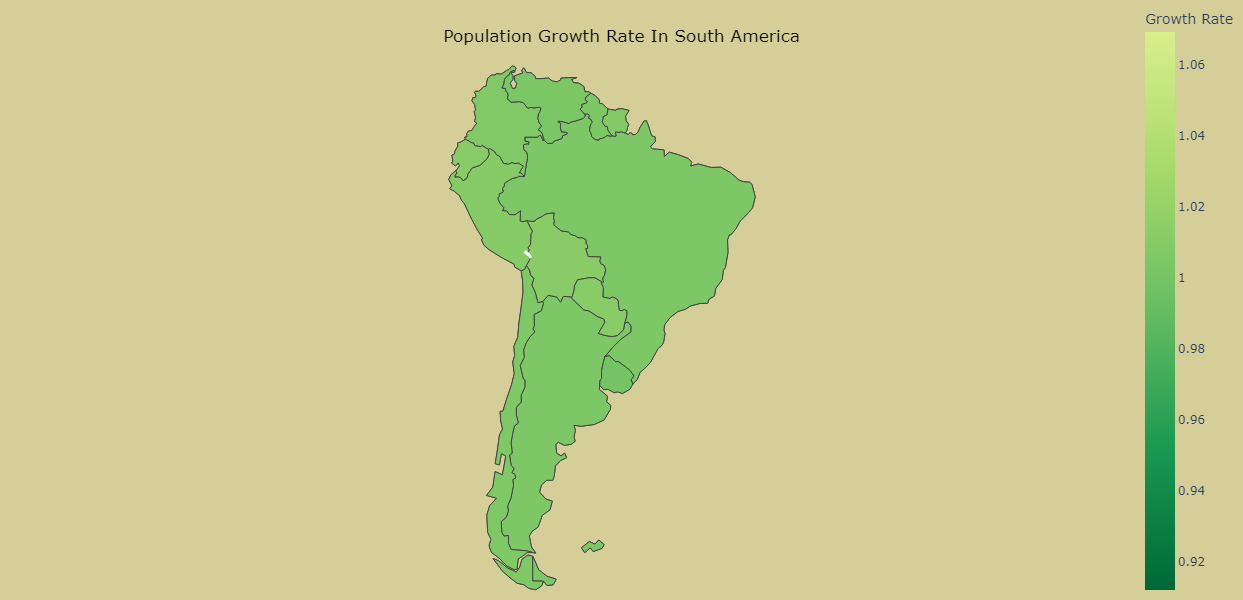

In [94]:
fig = px.choropleth(data_frame = data,
                    locations="Country/Territory",locationmode="country names", color="Growth Rate",
                    color_continuous_scale=palette[0:5],height= 600,scope="south america",
                    labels={"Growth Rate":"Growth Rate"})


fig.update_layout(title=dict(text= "Population Growth Rate In South America",
                             y=0.95,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  margin=dict(l=0, r=0, b=0, t=0),
                  geo_bgcolor="#D5CE98",
                  paper_bgcolor="#D5CE98")

fig.show()

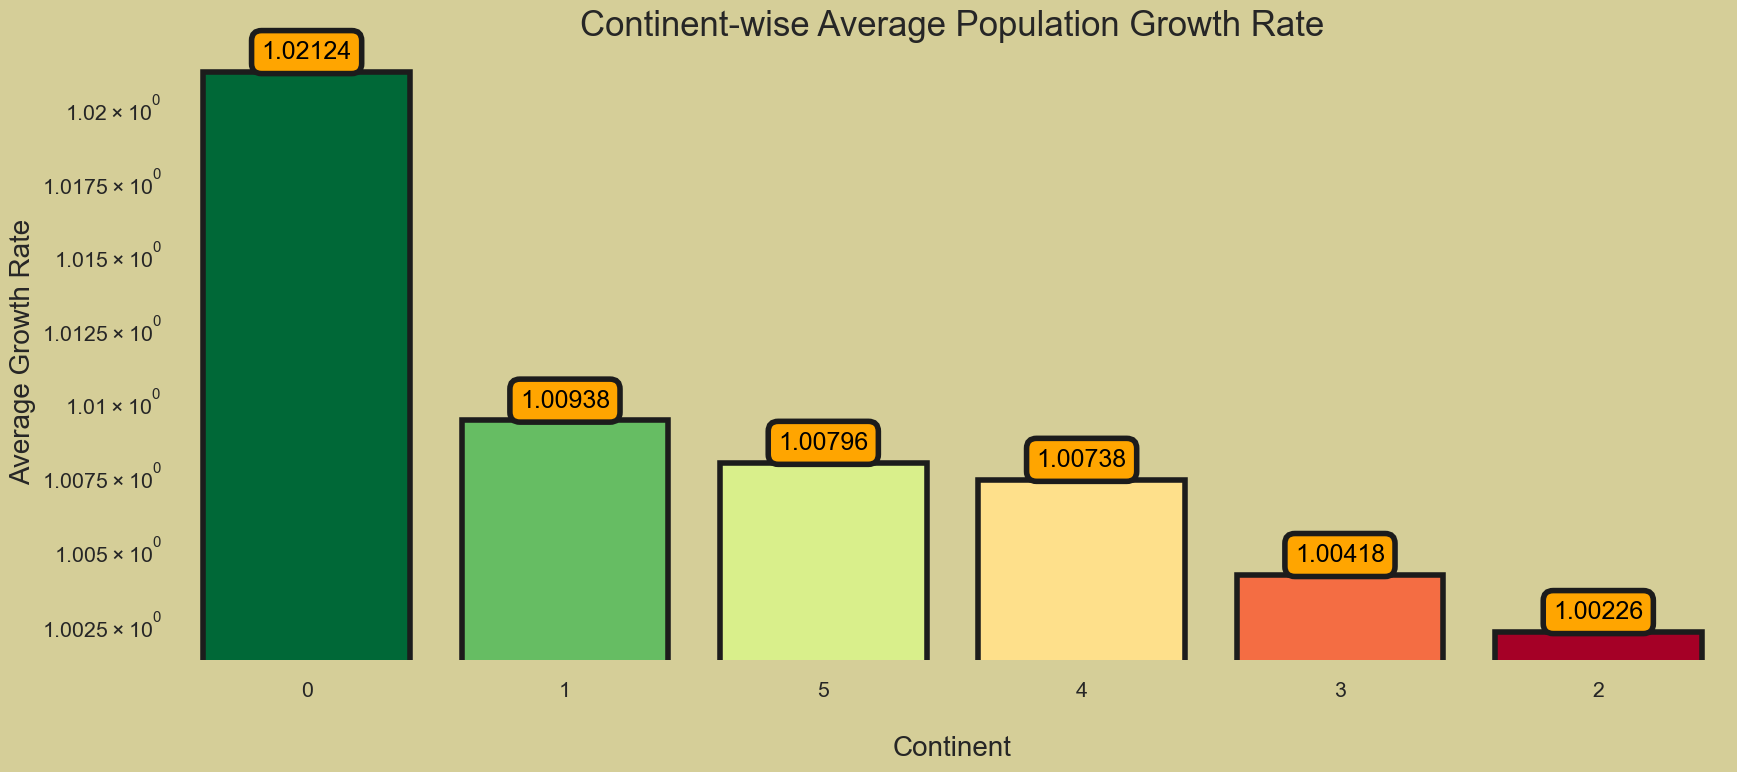

In [110]:
data_gr = data.copy()
data_gr = pd.DataFrame(data_gr.groupby(["Continent"])["Growth Rate"].mean())

plt.subplots(figsize=(20,8))
p=sns.barplot(x=data_gr.index, y=data_gr["Growth Rate"],order=data_gr.sort_values("Growth Rate",ascending=False).index,palette=palette[0:11:2], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.set_yscale("log")
p.set_title("Continent-wise Average Population Growth Rate",fontsize=25)
p.set_xlabel("\nContinent",fontsize=20)
p.set_ylabel("Average Growth Rate",fontsize=20)
p.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

In [98]:
def rank(feature,color):
    
    _, axes = plt.subplots(figsize=(20,8))
    sns.kdeplot(x=data[data["Continent"]==feature]["Rank"], y=data["2022 Population"],edgecolor="#1c1c1c",fill=True, kind="kde",shade=False,height=10,color=color)
    axes.set_title(f"\nCountry Rank Distribution [{feature}]\n",fontsize=25)
    axes.set_ylabel("Population",fontsize=20)
    axes.set_xlabel(f"\nCountry Rank [{feature} Continent]",fontsize=20)
    
    sns.despine(left=True, bottom=True)
    plt.show()

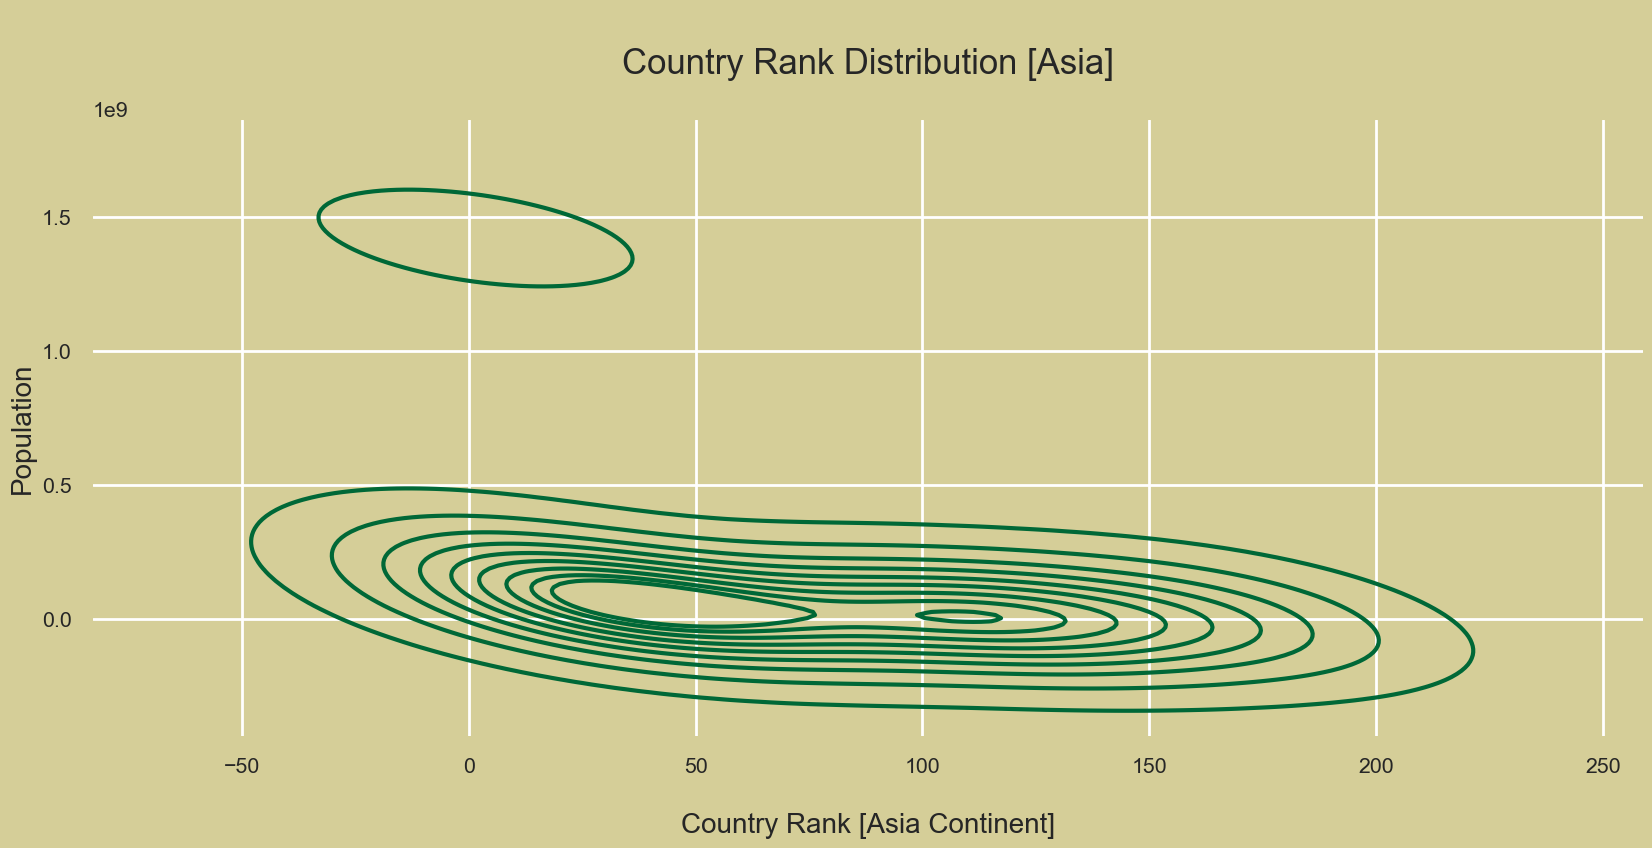

In [99]:
rank("Asia",palette[0])

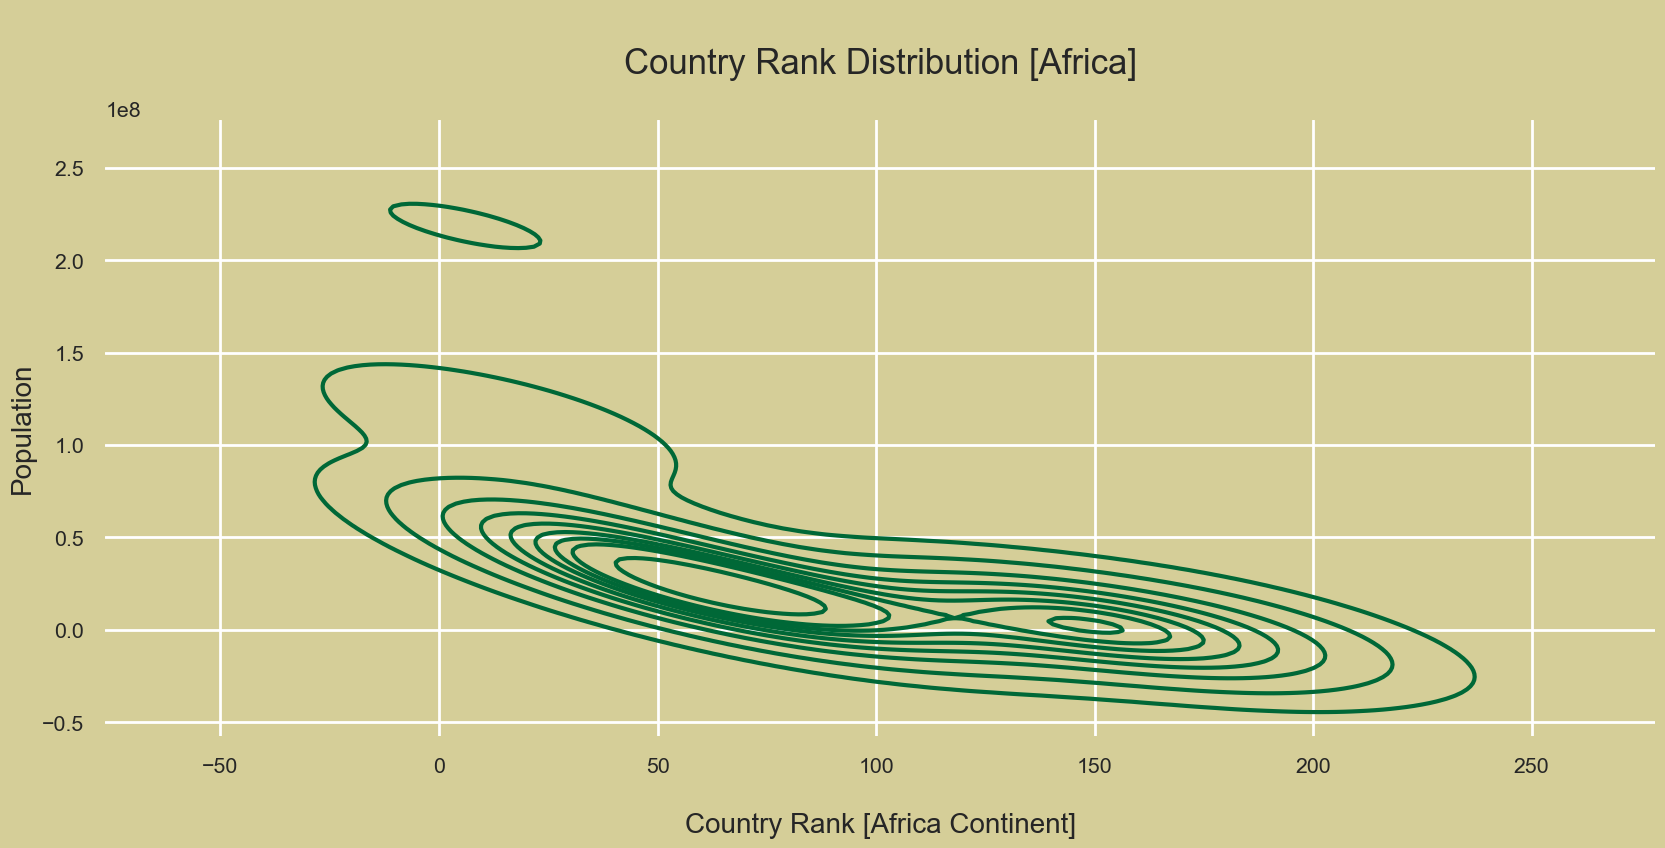

In [100]:
rank("Africa",palette[0])

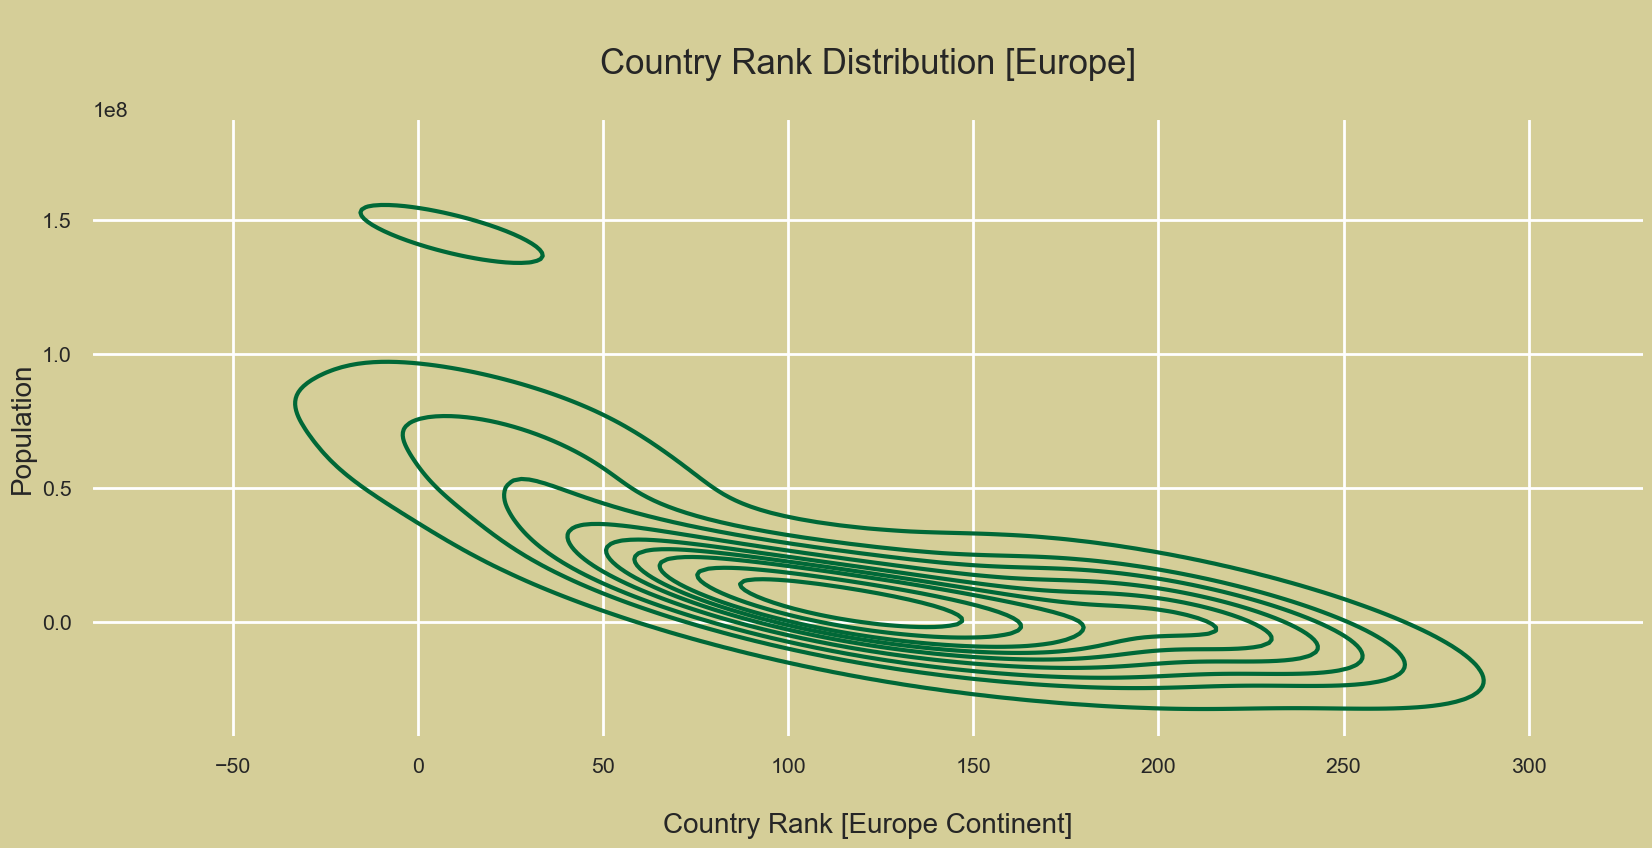

In [101]:
rank("Europe",palette[0])

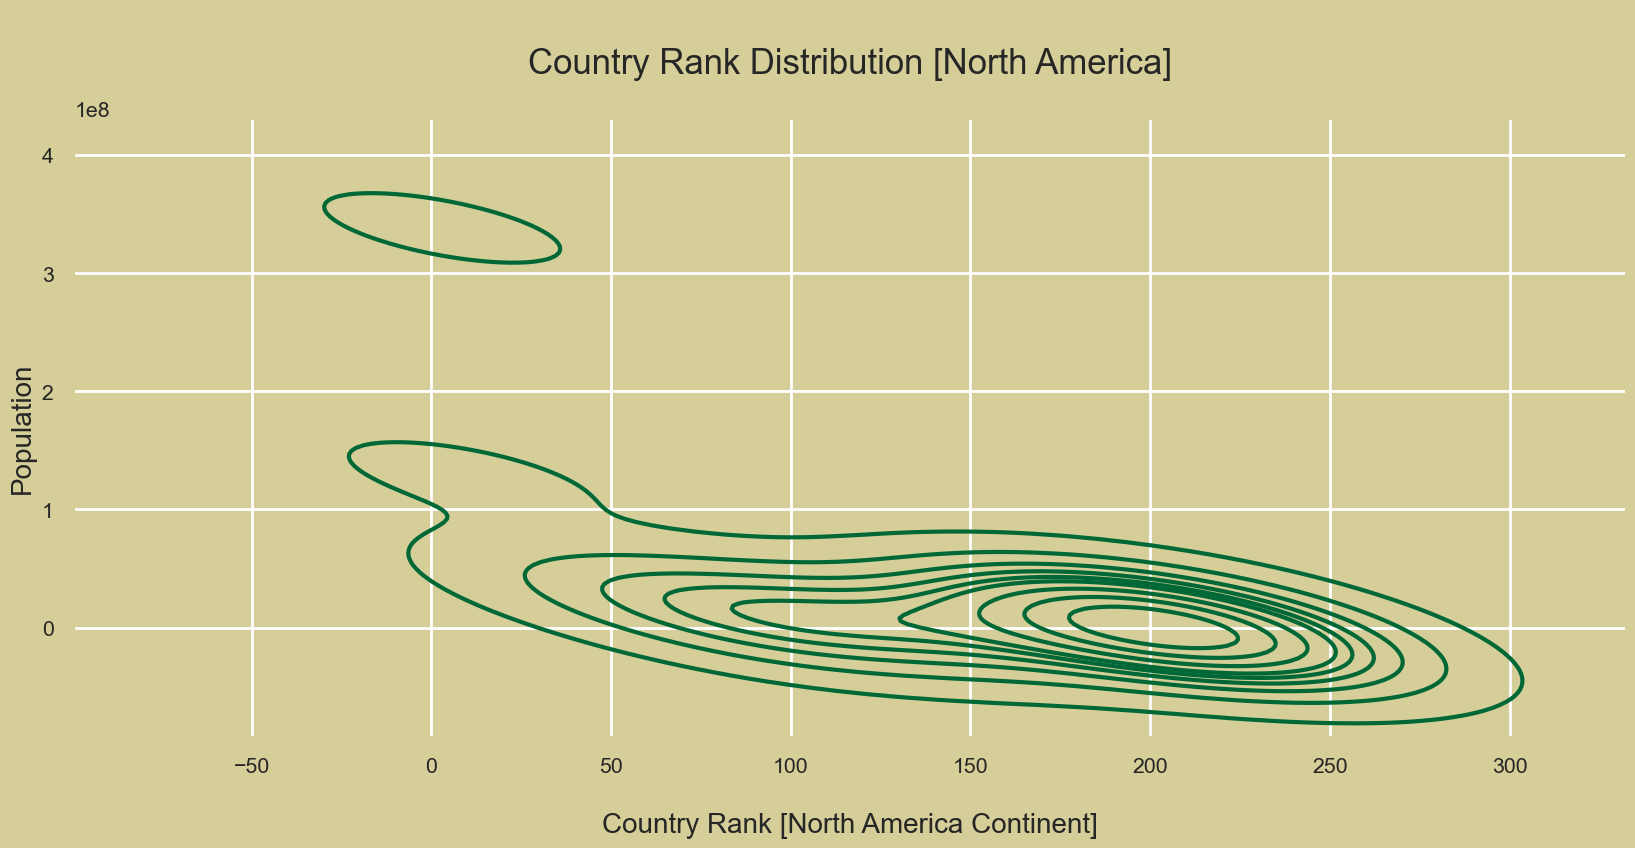

In [102]:
rank("North America",palette[0])

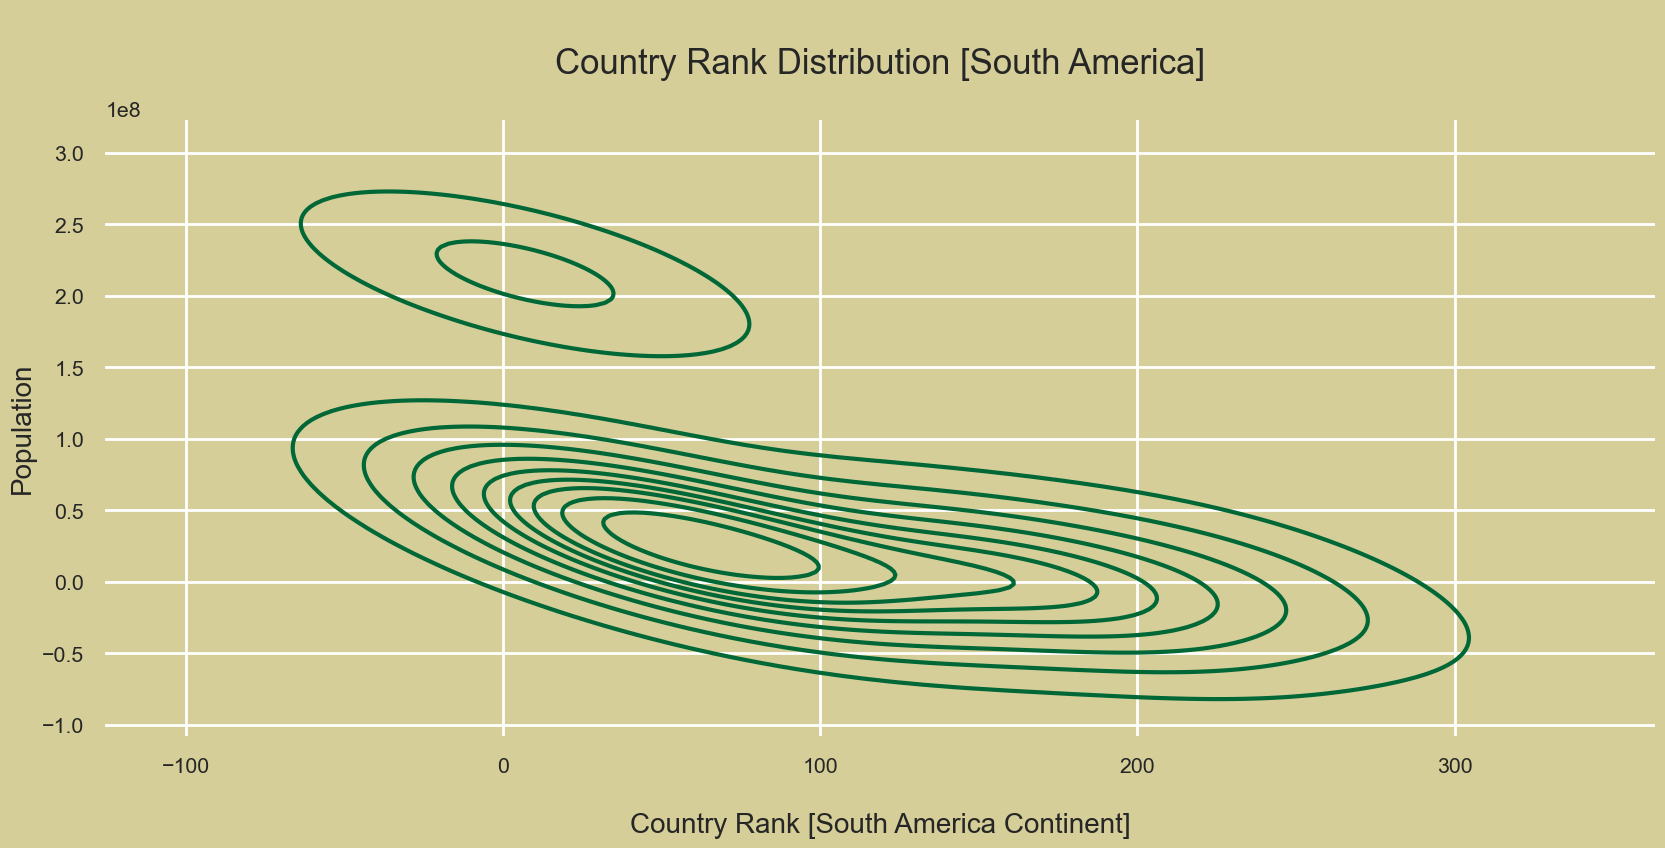

In [103]:
rank("South America",palette[0])

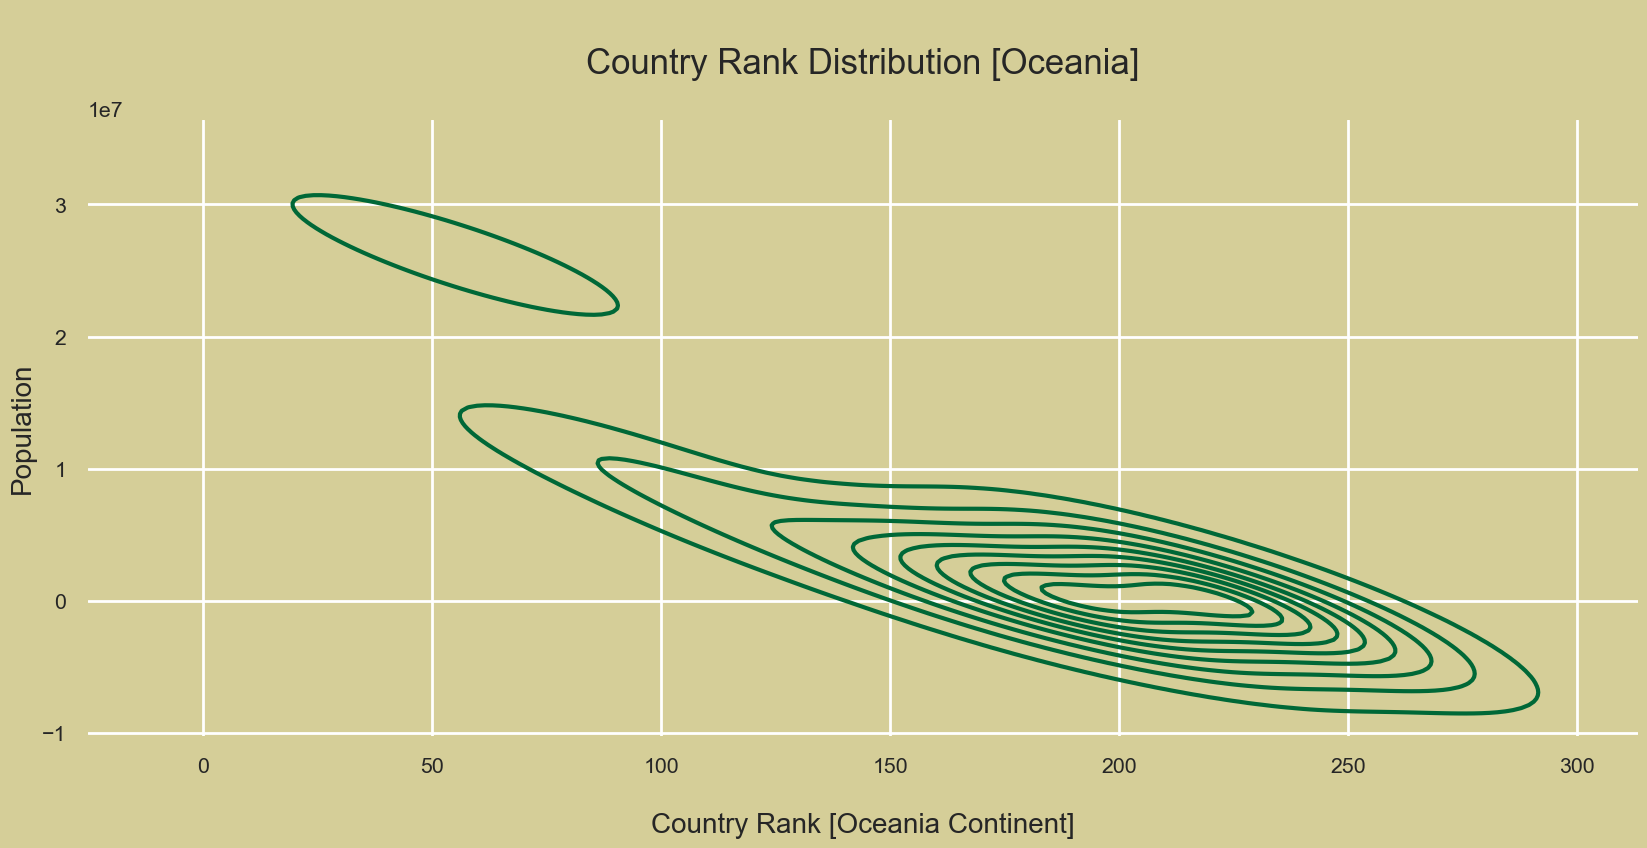

In [104]:
rank("Oceania",palette[0])

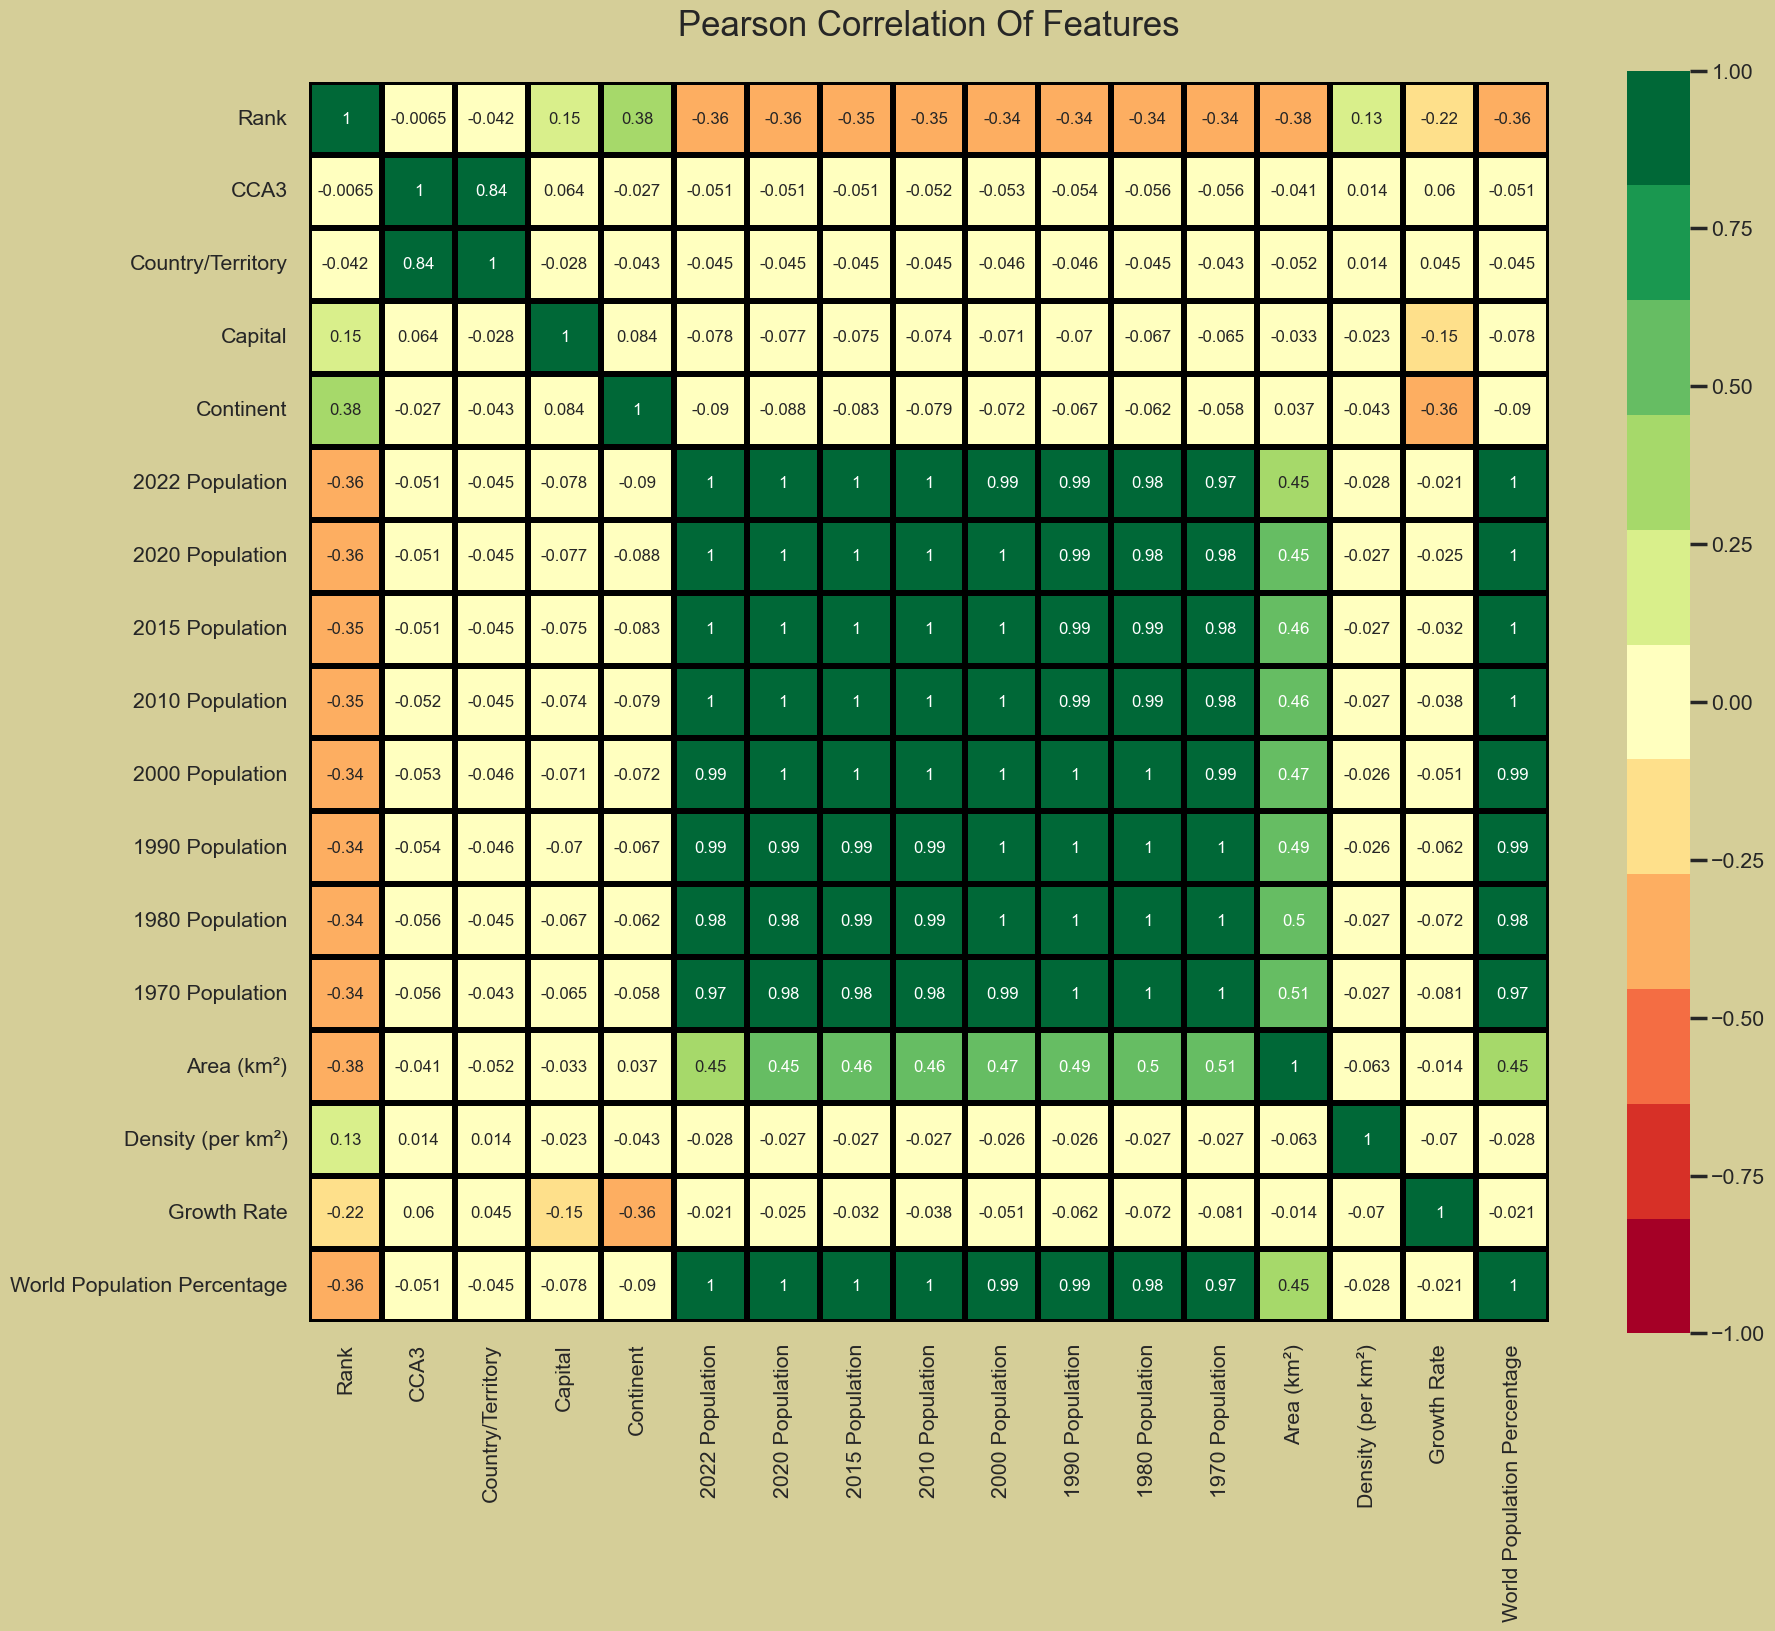

In [105]:
catcol = ["CCA3","Country/Territory","Capital","Continent"]
le = LabelEncoder()
for col in catcol:
        data[col] = le.fit_transform(data[col])


plt.subplots(figsize =(20, 20))

sns.heatmap(data.corr(), cmap = palette_cmap, square=True, cbar_kws=dict(shrink =.82), 
            annot=True, vmin=-1, vmax=1, linewidths=3,linecolor='black',annot_kws=dict(fontsize =12))
plt.title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.show()